In [1]:
import sys
sys.path.insert(0, 'C:/Udvikler/Speciale/SpecialeKode')

from utils import * 
import pandas as pd
from RFQAgent import RFQAgent, DataTransformer
import numpy as np
from model_evaluation.RFQModelEval import RFQModelEval
from model_evaluation import eval_utilities as eval_utils
import itertools
from inventory_and_risk_engineering import add_inventory_and_risk

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

#Not to make the kernel crash
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
#file_path = "data/data.csv"
#df = pd.read_csv(file_path)
#df = add_inventory_and_risk(df)

In [4]:
def train_loop(train_df, val_df):

    all_features = [
        #["DealersInCompetition", "FirmAccount", "IssuedAmount", "Oas", "BidAskSpread", "Side", "BookName", "KeyRatioPrice", "AllQMinMid", "AllQMaxMid", "AllQMeanMid", "MarketThicknes"],
        #["DealersInCompetition", "FirmAccount", "Side", "BookName", "AllQMinMid", "AllQMaxMid", "AllQMeanMid"],
        ["FirmAccount", "Oas", "BookName", "AllQMeanMid"],
        ["DealersInCompetition", "BookName",  "AllQMeanMid"]
    ]

    all_reward_functions = [
        simpleSpreadReward,
        linearMarginReward,
        quadraticMarginReward
    ]

    learning_algorithms = [
        'QL',
        'DQL',
        #'QL_MarkovGame',
        #'double_QL_MarkovGame',
        #'random_by_action_distr',
        #'random_by_uniform' 
    ]

    metrics = ["dealerHitRate", "mlHitRate", "MLWinShare", "mlDistToCoverMean", "mlDistToCoverStd", "dealerDistToCoverMean", 
            "meanMLProfit", "meanDealerProfit", "meanRLReward", "dealerD2TargetMean", "MLD2TargetMean", "MLD2TargetStd", "meanMLSharpeRatio",
            "meanDealerSharpeRatio"]

    # Convert each list of features to a single concatenated string
    all_features_str = [",".join(features) for features in all_features]  # Join list of strings with commas

    # Create a MultiIndex for the DataFrame using the combinations of parameters
    index = pd.MultiIndex.from_tuples(
        [(features, reward_function.__name__, learning_algorithm)
        for features, reward_function, learning_algorithm in itertools.product(all_features_str, all_reward_functions, learning_algorithms)],
        names=["Features", "Reward Function", "Learning Algorithm"]
    )

    # Initialize an empty DataFrame with the MultiIndex
    results_df = pd.DataFrame(columns=metrics, index=index)

    # Iterate over all combinations and collect results
    for features, reward_function, learning_algorithm in itertools.product(all_features, all_reward_functions, learning_algorithms):
        # Convert features list to a single string
        features_key = ",".join(features)  # Join list of strings with commas
        key = (features_key, reward_function.__name__, learning_algorithm)
        
        Opponent_actions = learning_algorithm in ["QL_MarkovGame", "double_QL_MarkovGame"]
        
        # Perform the experiment (replace with your actual code)
        data_transformer = DataTransformer(
            input_features=features, lower_spread_limit=-0.005, upper_spread_limit=0.15, num_bins=4,
            discretize_method="number", reward_function=reward_function, Opponent_actions=Opponent_actions)
        
        agent = RFQAgent(data_transformer=data_transformer)
        agent.train(train_df.copy(), algorithm=learning_algorithm)

        modelEvaluator = RFQModelEval(agent)
        modelPerformance = modelEvaluator.eval(val_df.copy(), algorithm=learning_algorithm, print_post_trade=False, print_violin_plot=False)
        
        # Collect and store the relevant metrics
        results_df.loc[key] = modelPerformance[metrics]  # Example of storing mean values

    # Display the results DataFrame
    print(results_df)
    eval_utils.visualize_trader_vs_ML_metrics(results_df=results_df.copy())
    eval_utils.convex_hull(results_df.copy(), distance_measure="Target")


Results for ISIN DK0009507931, counts: 253
number of different states in dataset: 65,
size of statespace: 112,
state coverage by trajectory: 0.5804
number of different states in dataset: 65,
size of statespace: 112,
state coverage by trajectory: 0.5804
number of different states in dataset: 66,
size of statespace: 128,
state coverage by trajectory: 0.5156
number of different states in dataset: 66,
size of statespace: 128,
state coverage by trajectory: 0.5156
number of different states in dataset: 66,
size of statespace: 128,
state coverage by trajectory: 0.5156
number of different states in dataset: 66,
size of statespace: 128,
state coverage by trajectory: 0.5156
number of different states in dataset: 12,
size of statespace: 16,
state coverage by trajectory: 0.75
number of different states in dataset: 12,
size of statespace: 16,
state coverage by trajectory: 0.75
number of different states in dataset: 12,
size of statespace: 16,
state coverage by trajectory: 0.75
number of different s

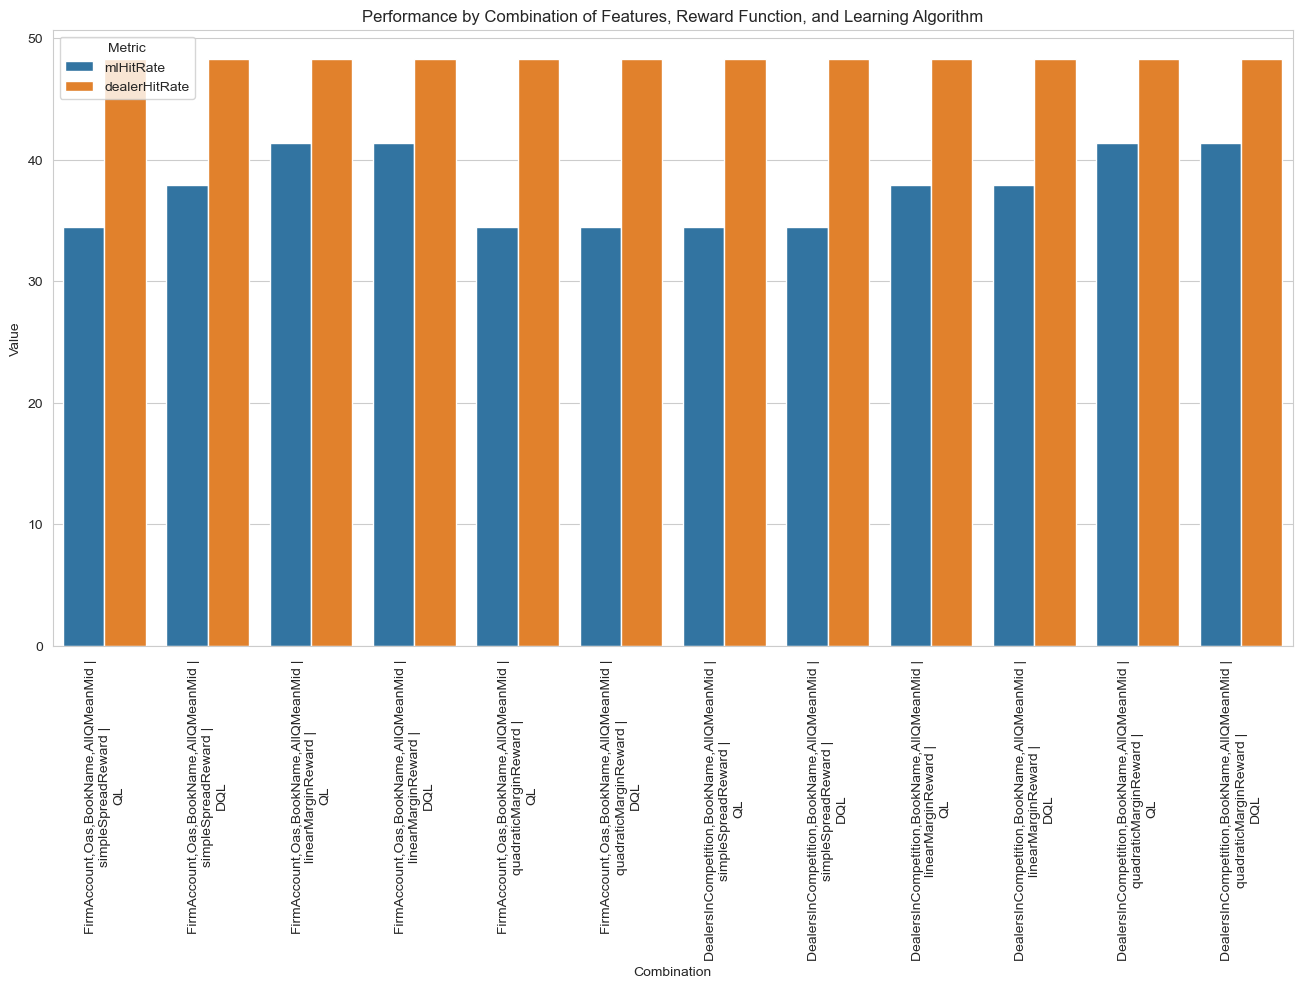

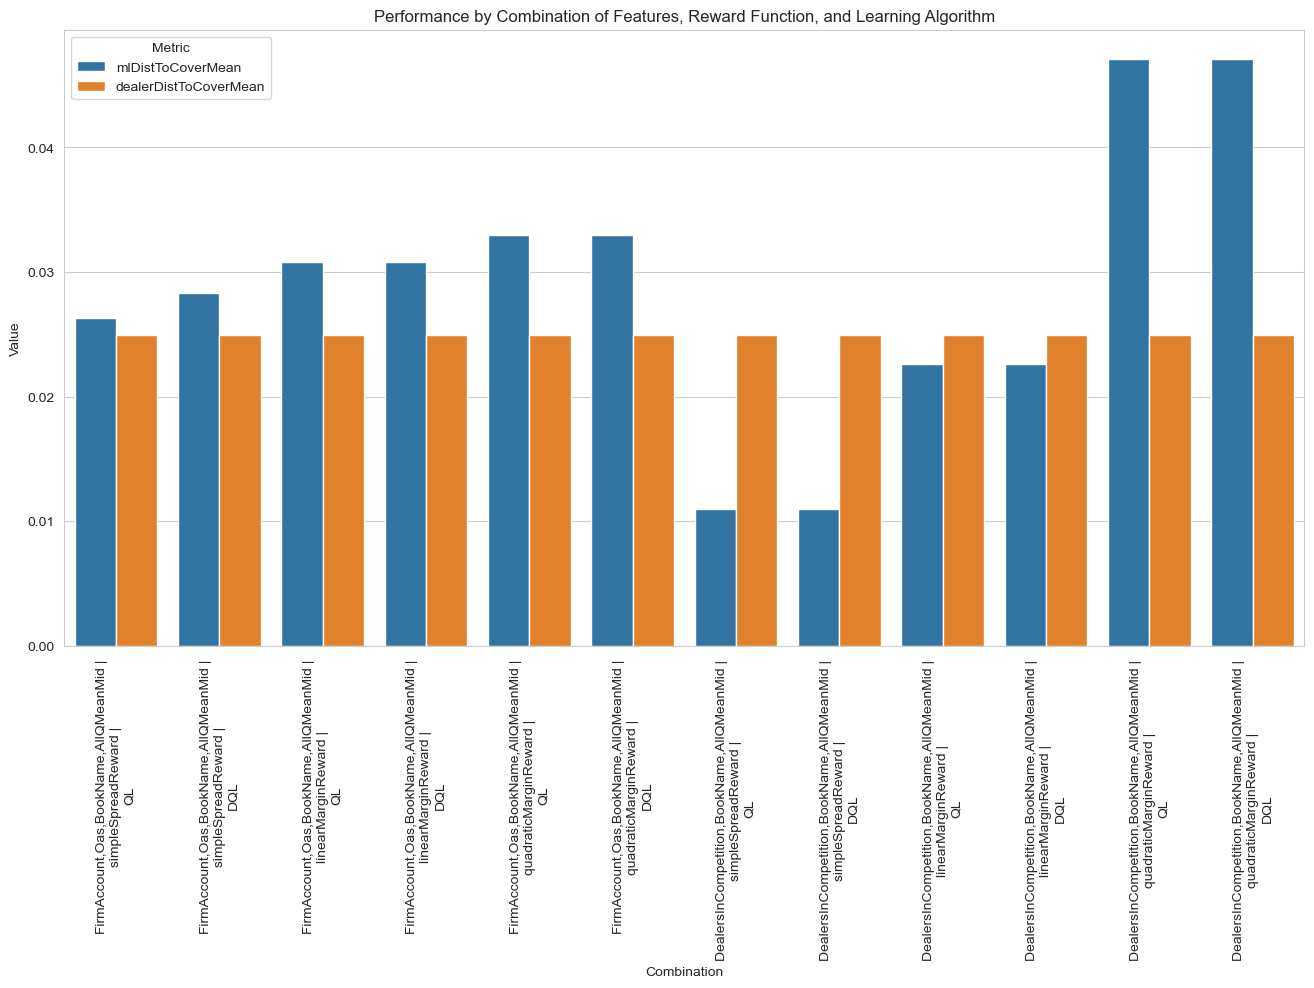

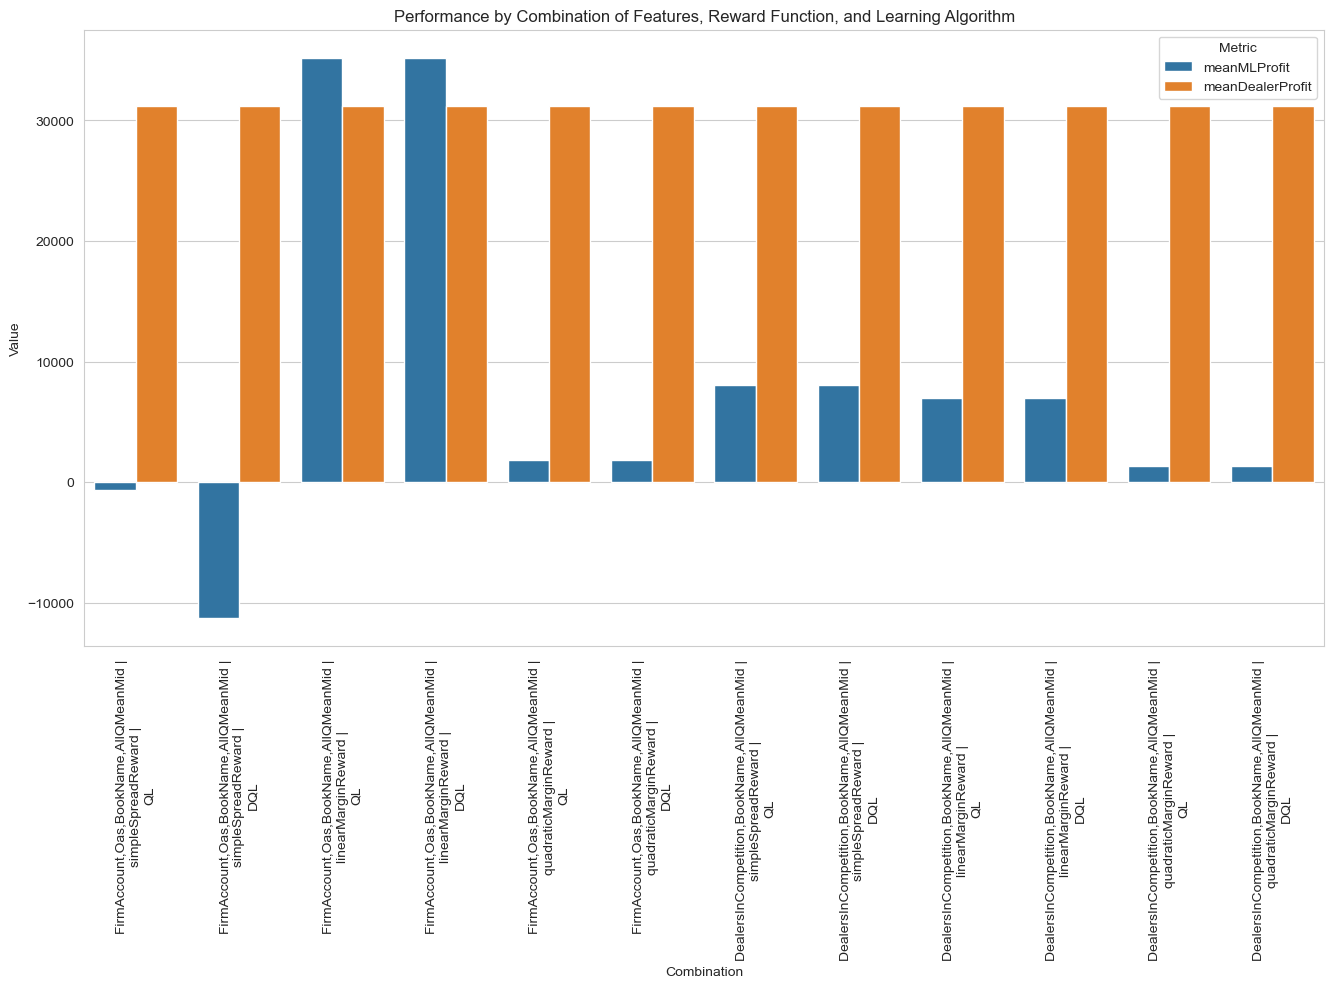

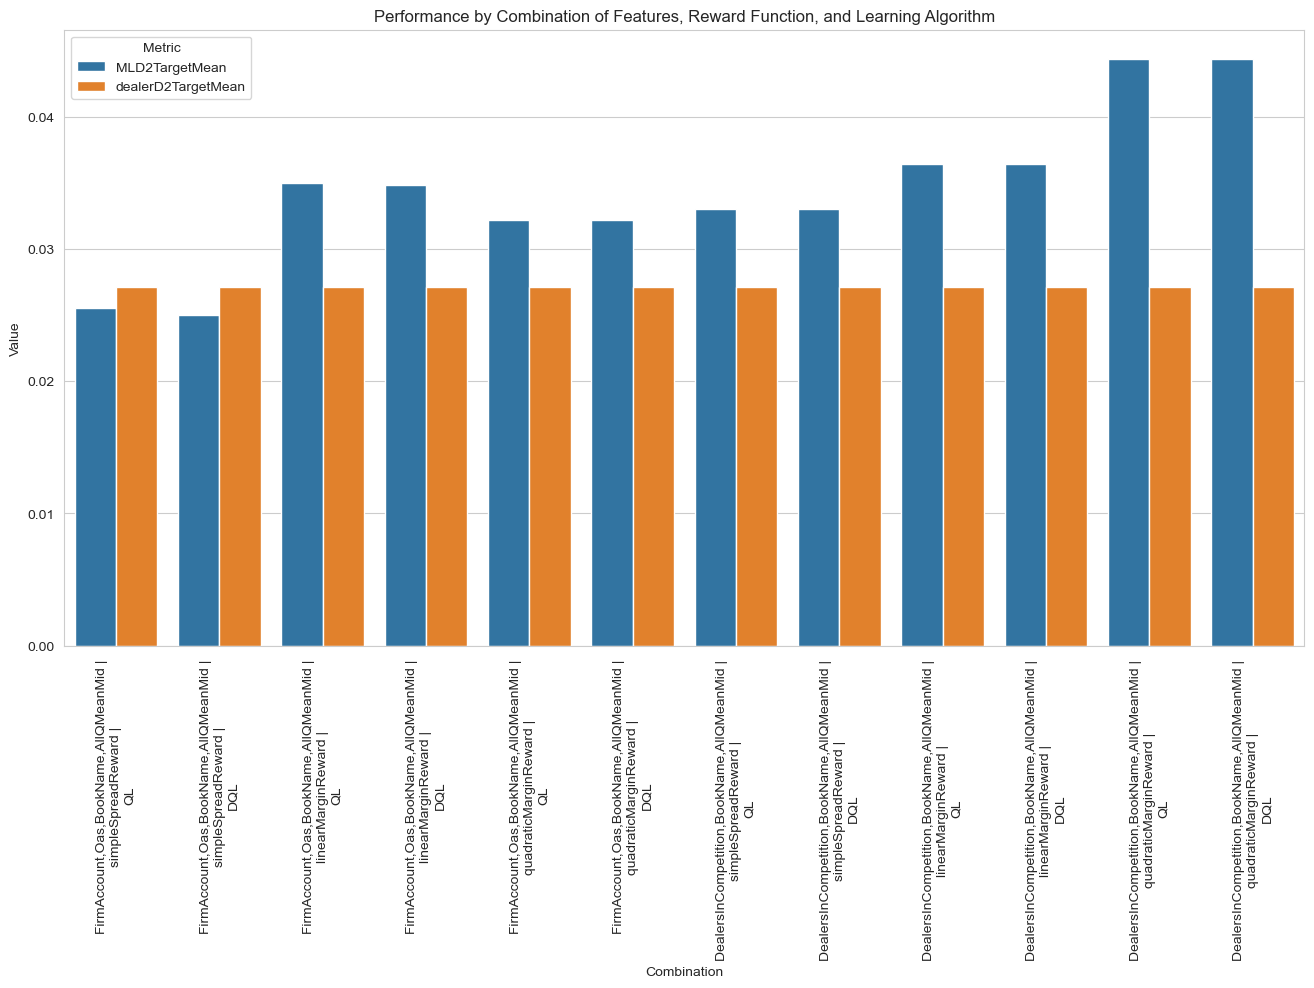

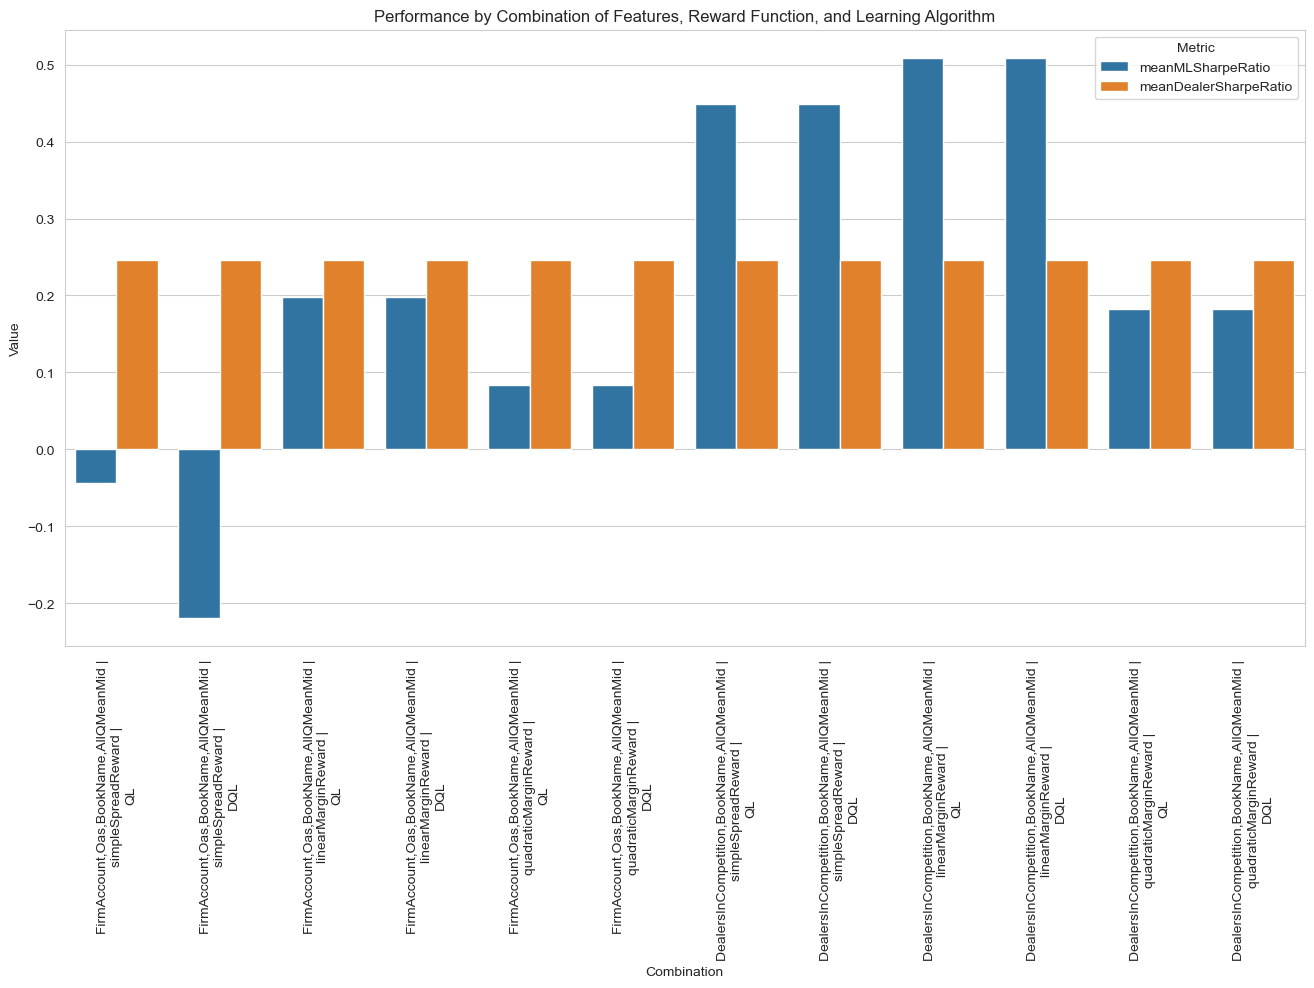

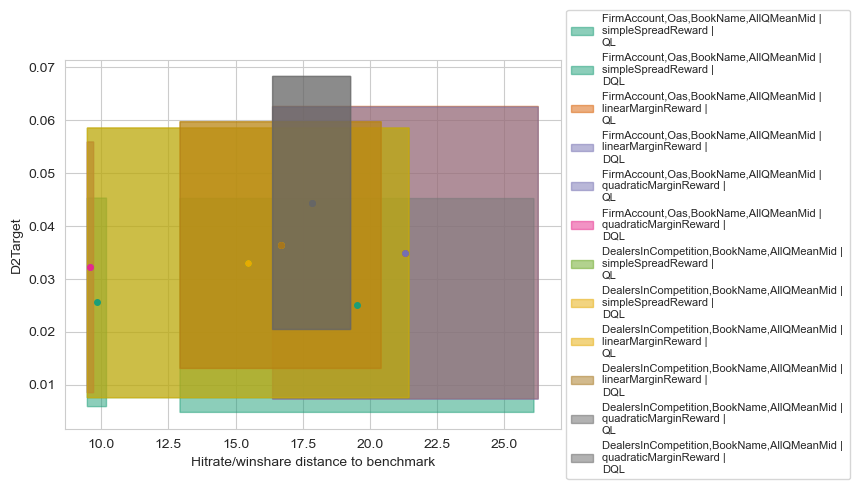



Results for ISIN DK0009515363, counts: 245
number of different states in dataset: 56,
size of statespace: 96,
state coverage by trajectory: 0.5833
number of different states in dataset: 56,
size of statespace: 96,
state coverage by trajectory: 0.5833
number of different states in dataset: 56,
size of statespace: 112,
state coverage by trajectory: 0.5
number of different states in dataset: 56,
size of statespace: 112,
state coverage by trajectory: 0.5
number of different states in dataset: 56,
size of statespace: 112,
state coverage by trajectory: 0.5
number of different states in dataset: 56,
size of statespace: 112,
state coverage by trajectory: 0.5
number of different states in dataset: 12,
size of statespace: 16,
state coverage by trajectory: 0.75
number of different states in dataset: 12,
size of statespace: 16,
state coverage by trajectory: 0.75
number of different states in dataset: 12,
size of statespace: 16,
state coverage by trajectory: 0.75
number of different states in dat

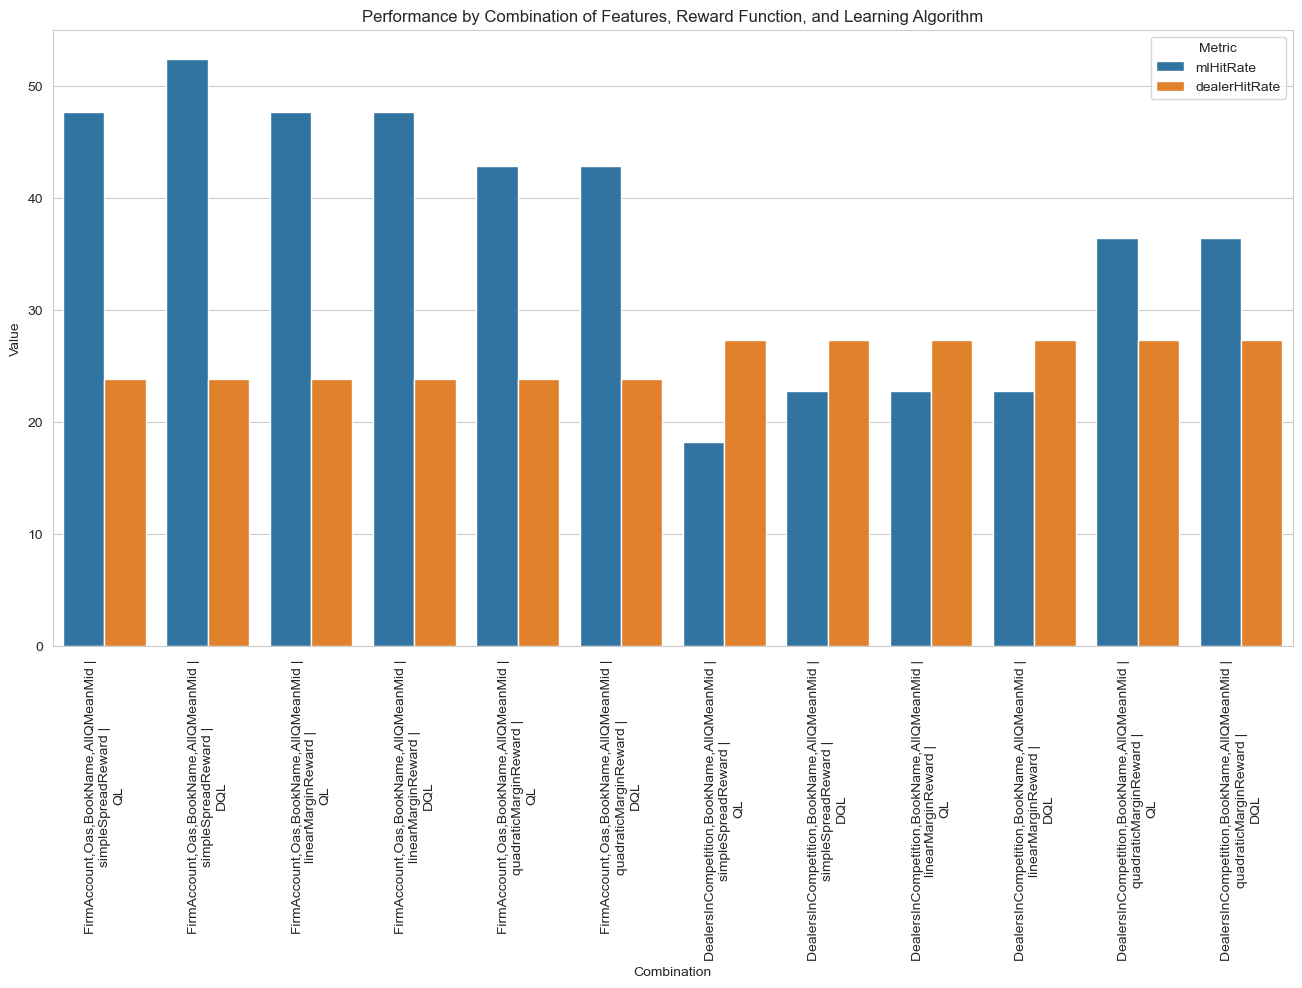

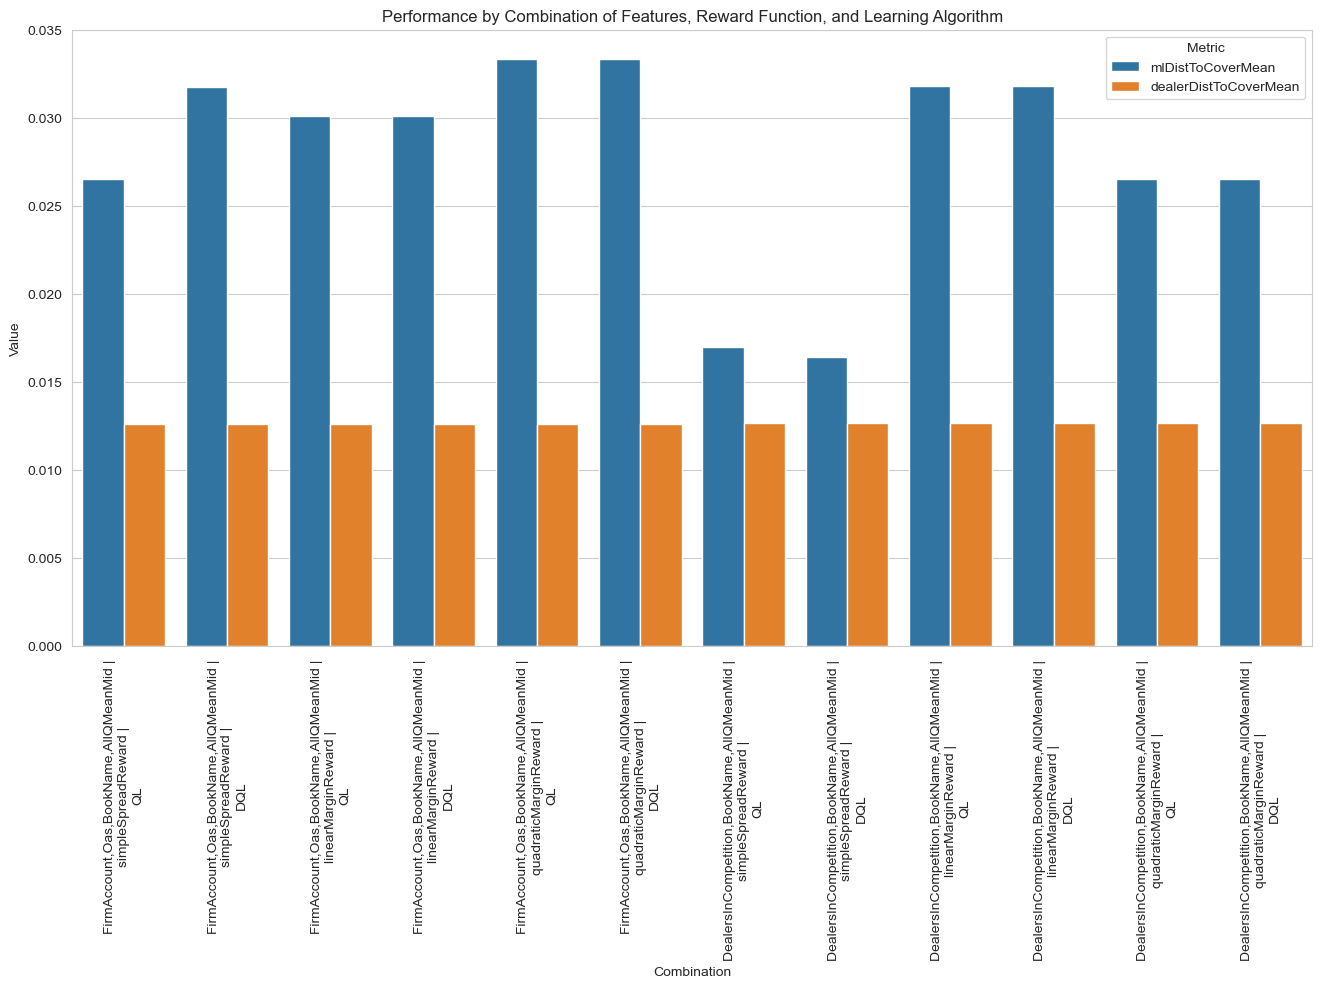

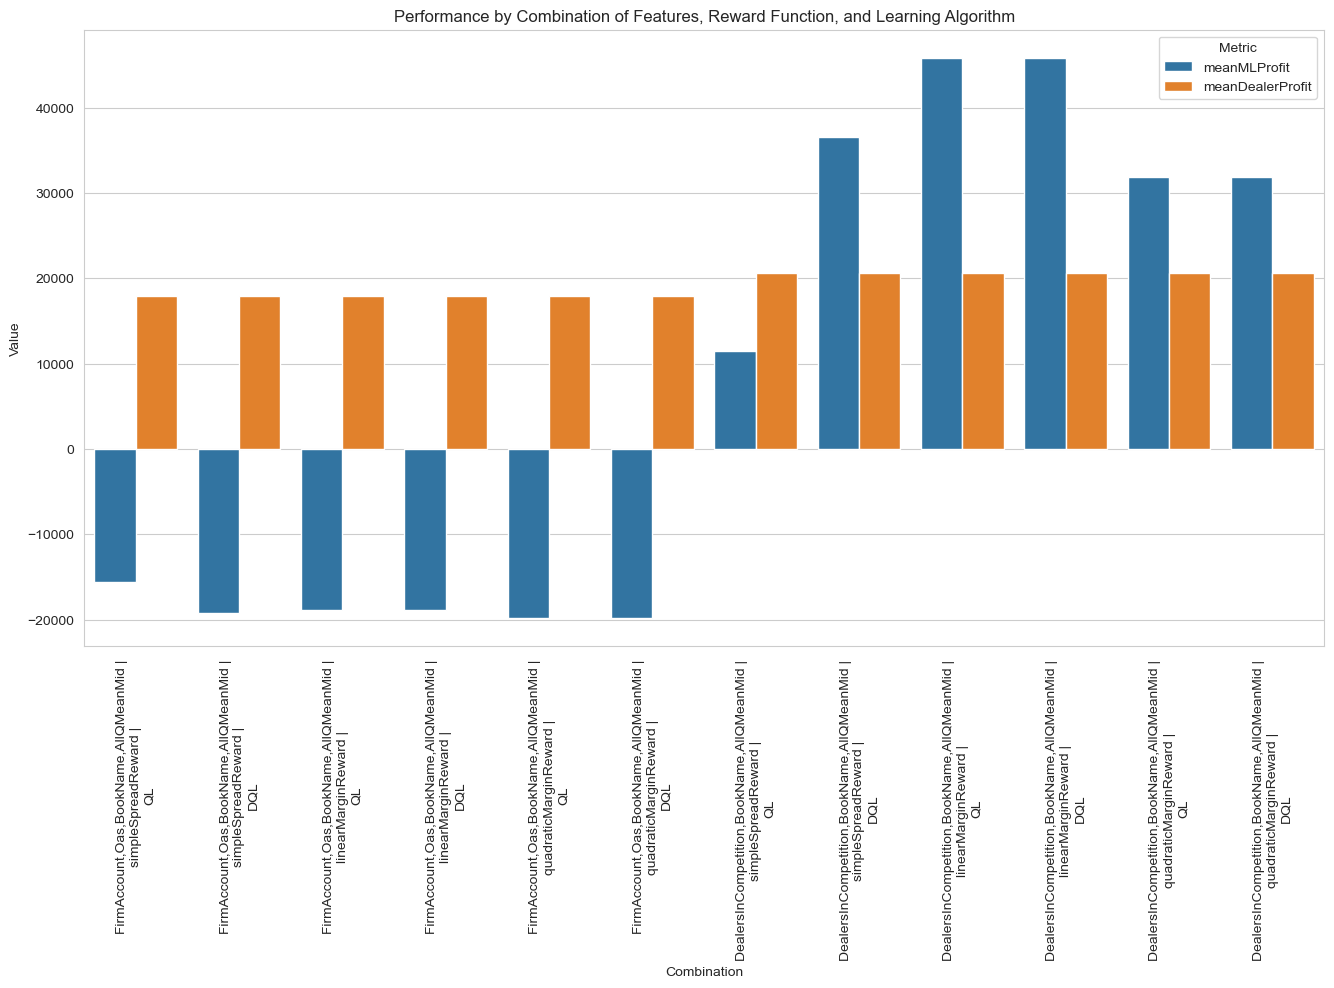

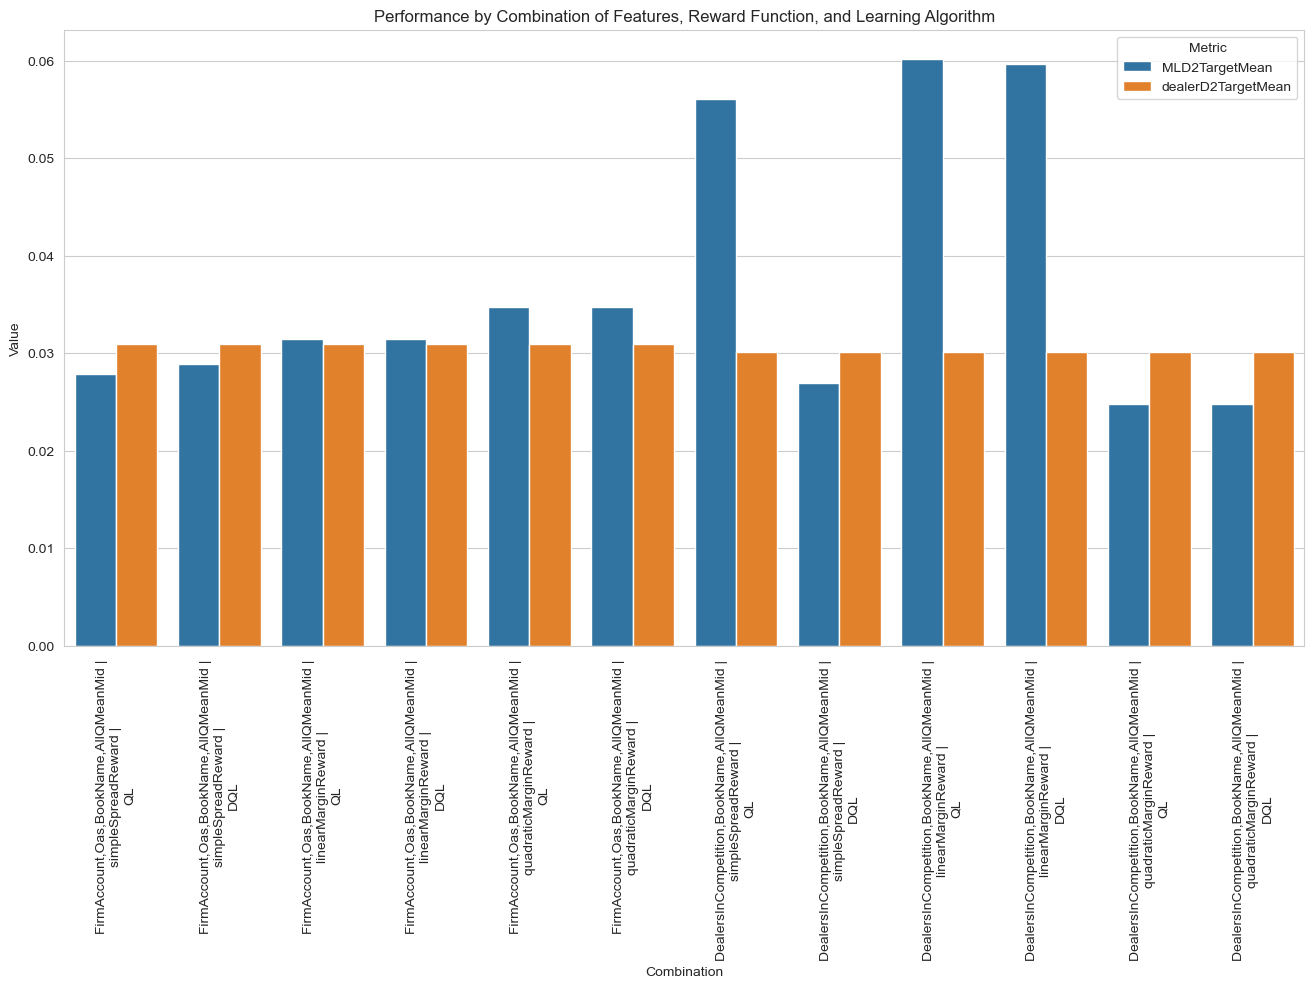

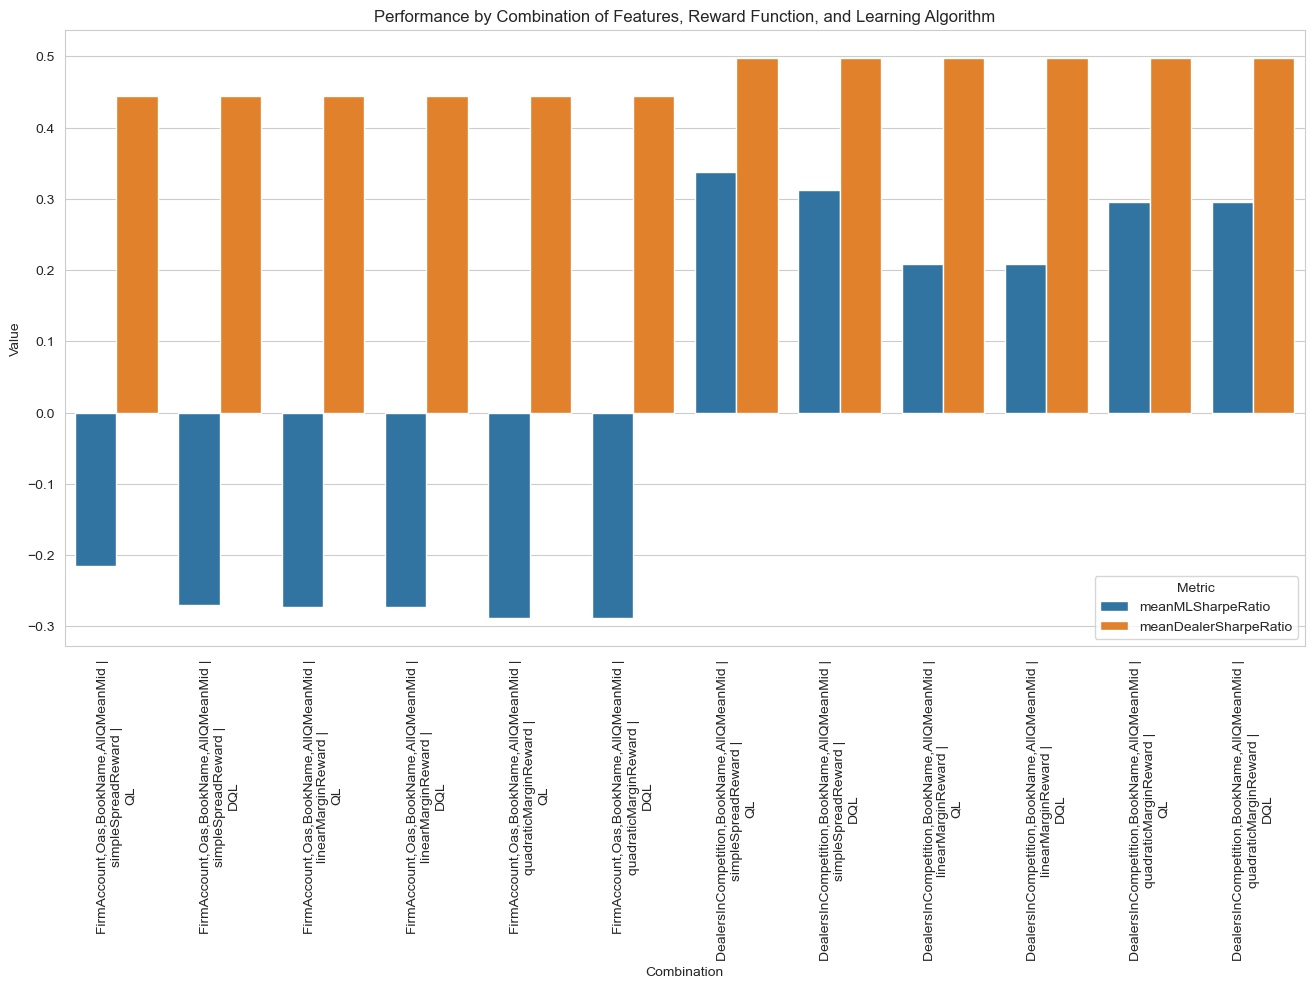

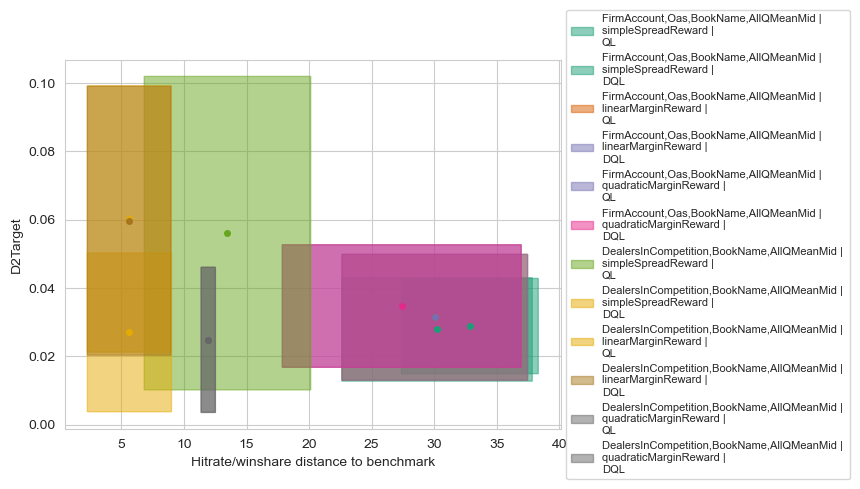



Results for ISIN DK0009296469, counts: 226
number of different states in dataset: 92,
size of statespace: 384,
state coverage by trajectory: 0.2396
number of different states in dataset: 92,
size of statespace: 384,
state coverage by trajectory: 0.2396
number of different states in dataset: 87,
size of statespace: 384,
state coverage by trajectory: 0.2266
number of different states in dataset: 87,
size of statespace: 384,
state coverage by trajectory: 0.2266
number of different states in dataset: 87,
size of statespace: 384,
state coverage by trajectory: 0.2266
number of different states in dataset: 87,
size of statespace: 384,
state coverage by trajectory: 0.2266
number of different states in dataset: 24,
size of statespace: 32,
state coverage by trajectory: 0.75
number of different states in dataset: 24,
size of statespace: 32,
state coverage by trajectory: 0.75
number of different states in dataset: 24,
size of statespace: 32,
state coverage by trajectory: 0.75
number of different

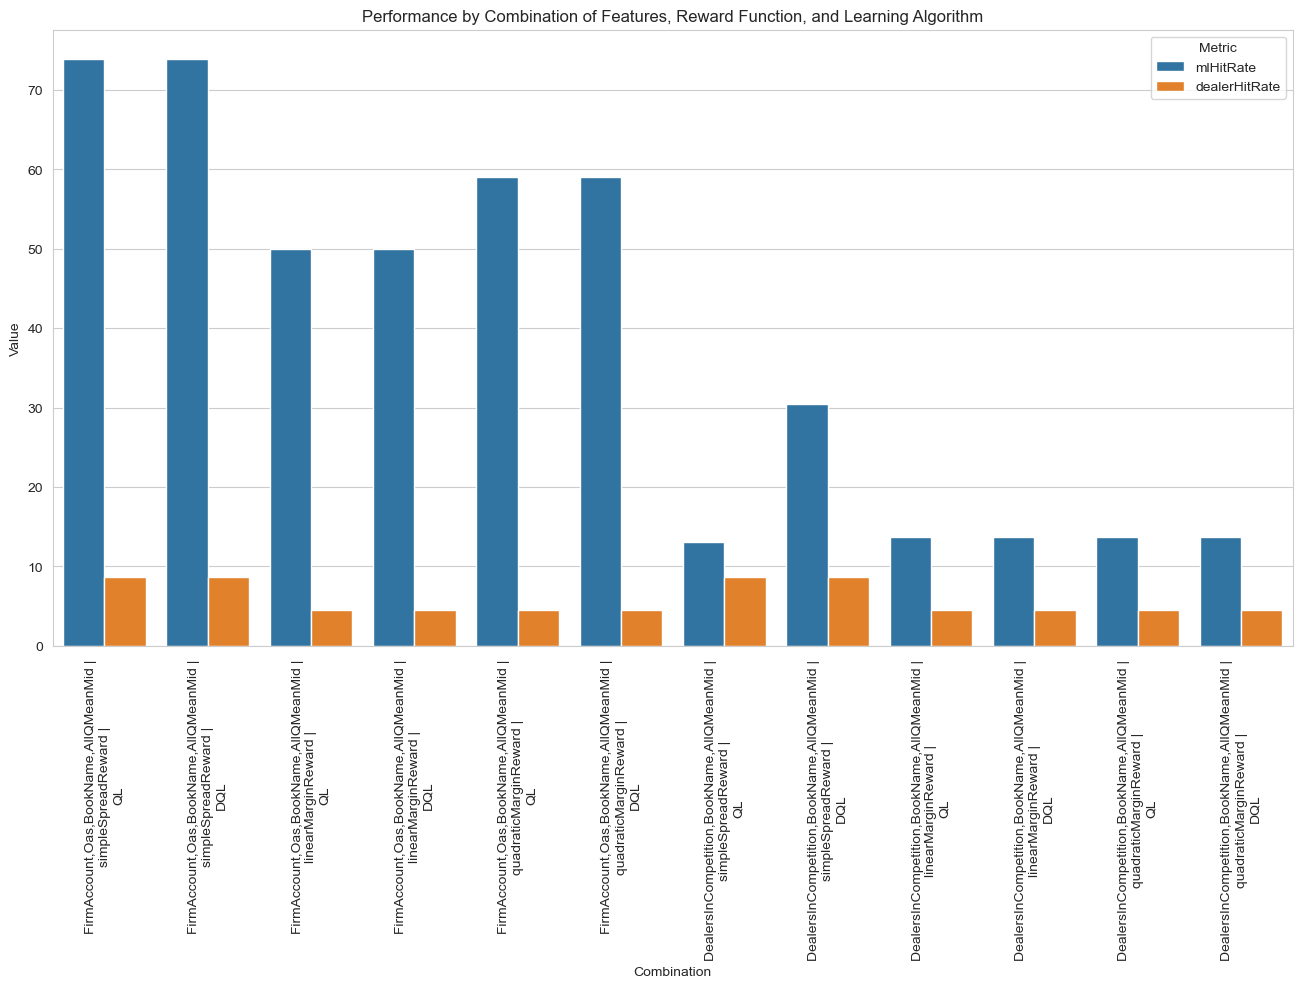

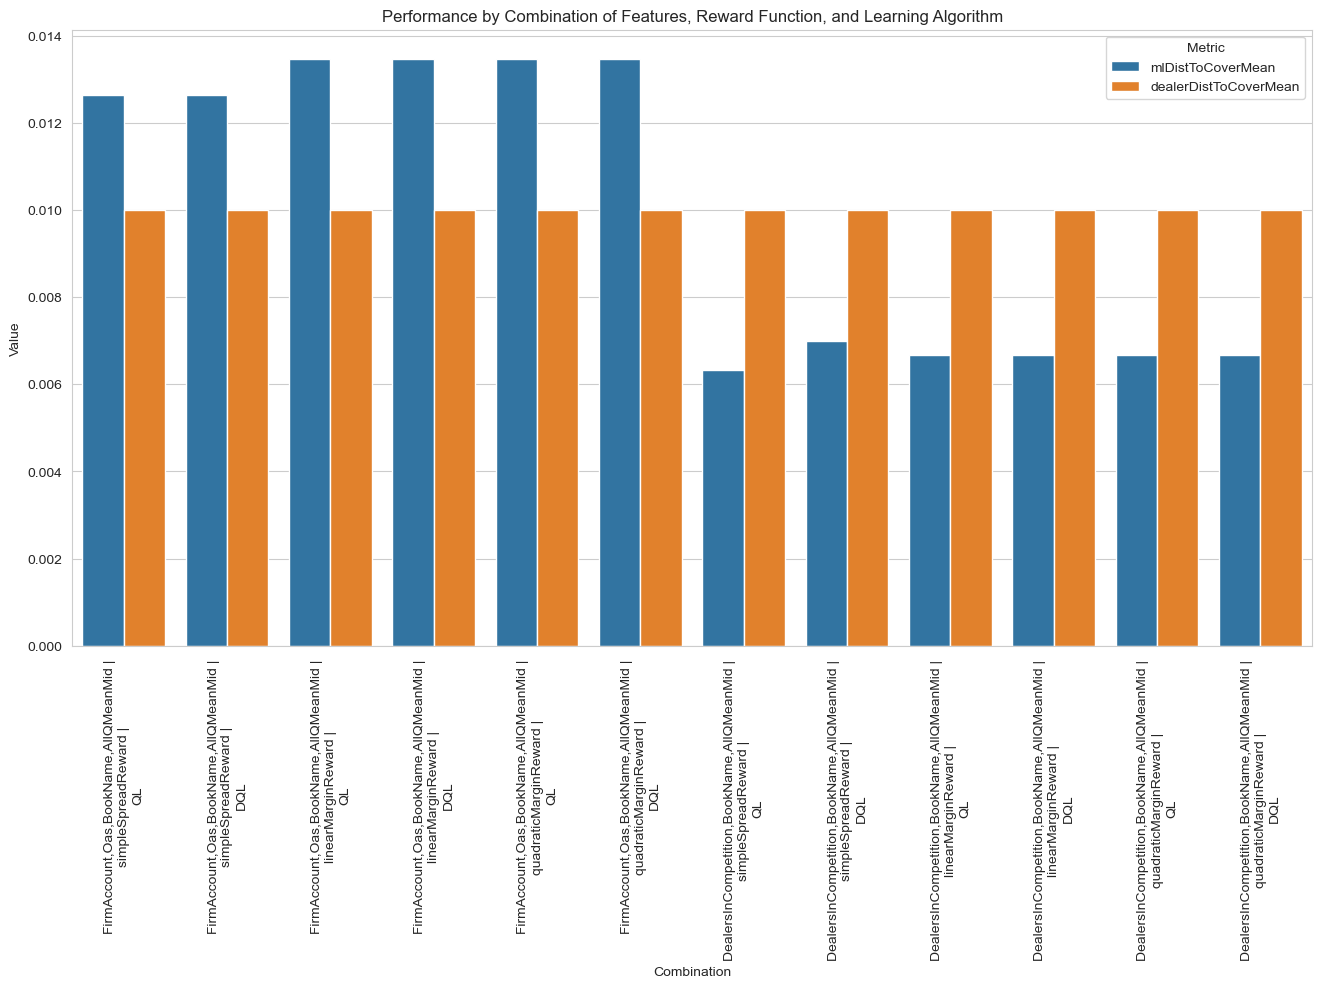

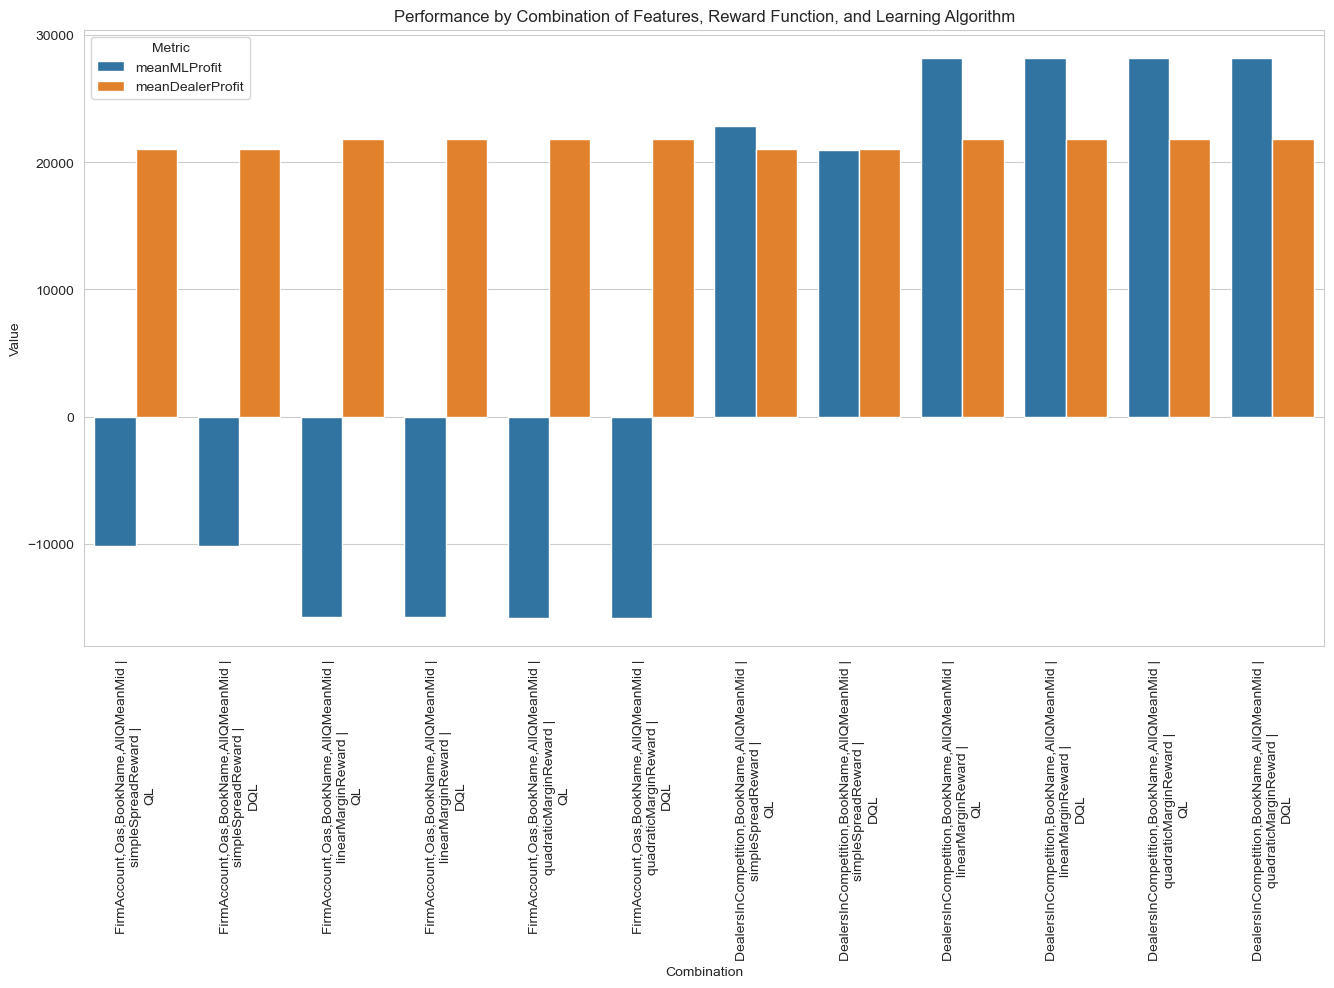

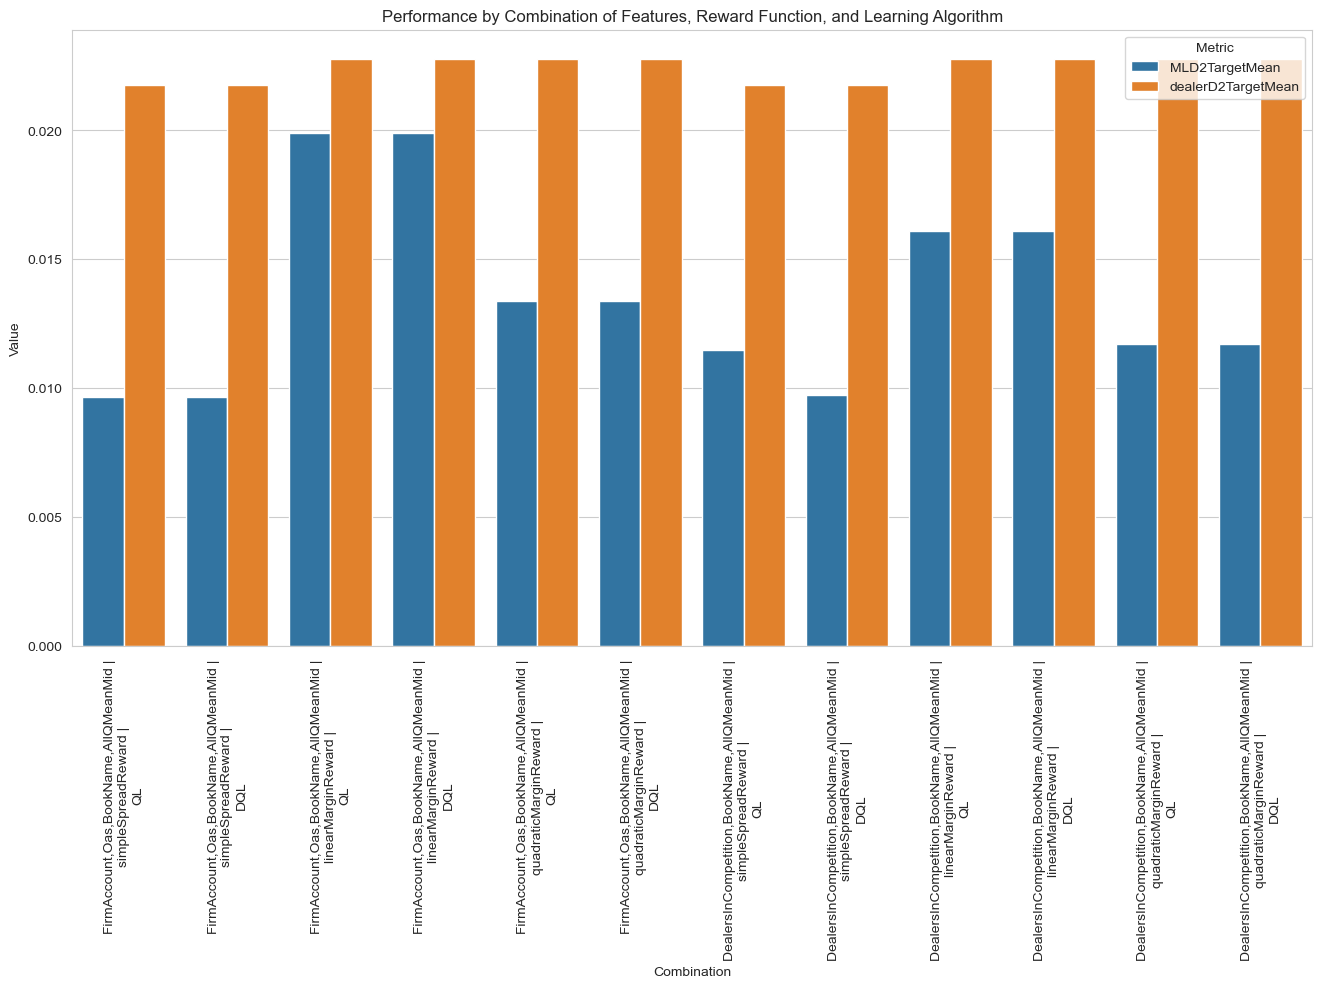

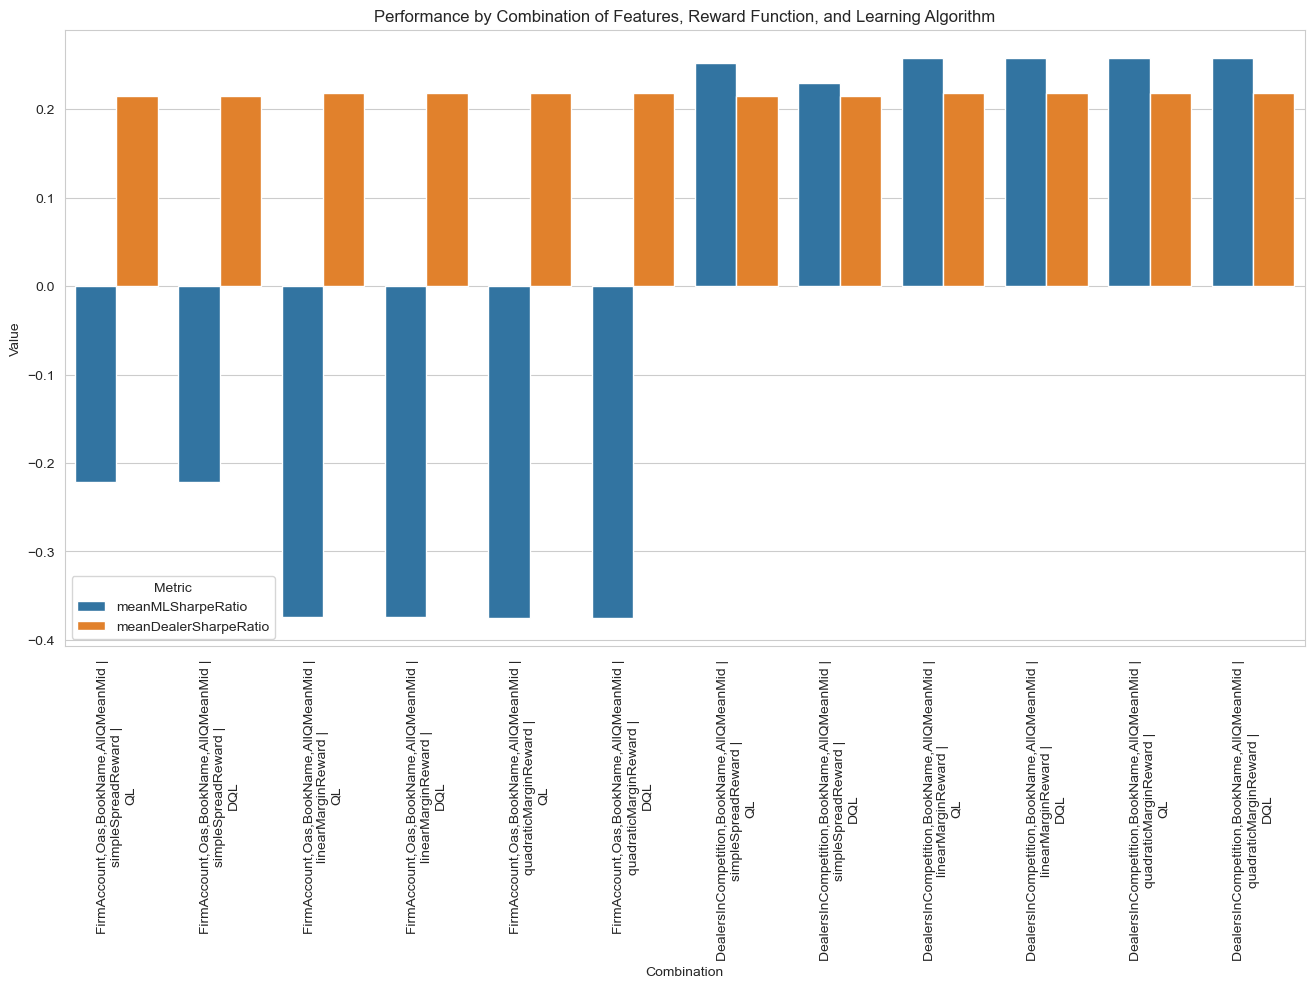

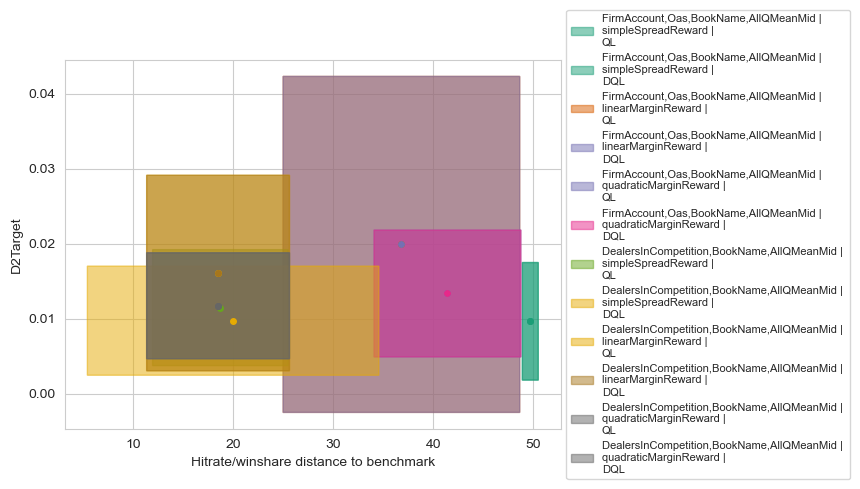



Results for ISIN DK0009295149, counts: 216
number of different states in dataset: 72,
size of statespace: 256,
state coverage by trajectory: 0.2812
number of different states in dataset: 72,
size of statespace: 256,
state coverage by trajectory: 0.2812
number of different states in dataset: 66,
size of statespace: 256,
state coverage by trajectory: 0.2578
number of different states in dataset: 66,
size of statespace: 256,
state coverage by trajectory: 0.2578
number of different states in dataset: 66,
size of statespace: 256,
state coverage by trajectory: 0.2578
number of different states in dataset: 66,
size of statespace: 256,
state coverage by trajectory: 0.2578
number of different states in dataset: 18,
size of statespace: 32,
state coverage by trajectory: 0.5625
number of different states in dataset: 18,
size of statespace: 32,
state coverage by trajectory: 0.5625
number of different states in dataset: 16,
size of statespace: 32,
state coverage by trajectory: 0.5
number of differ

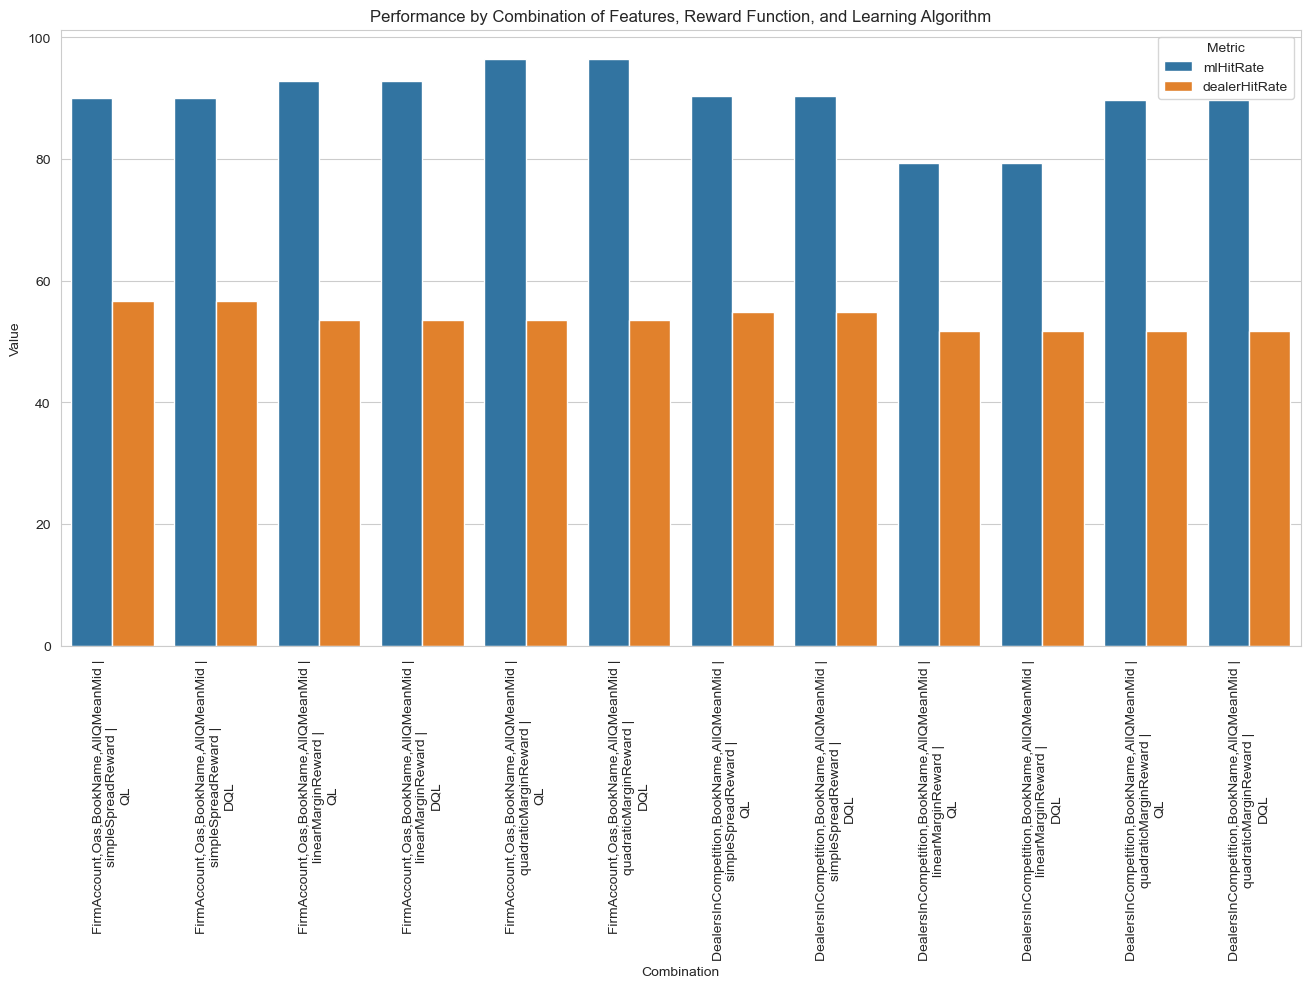

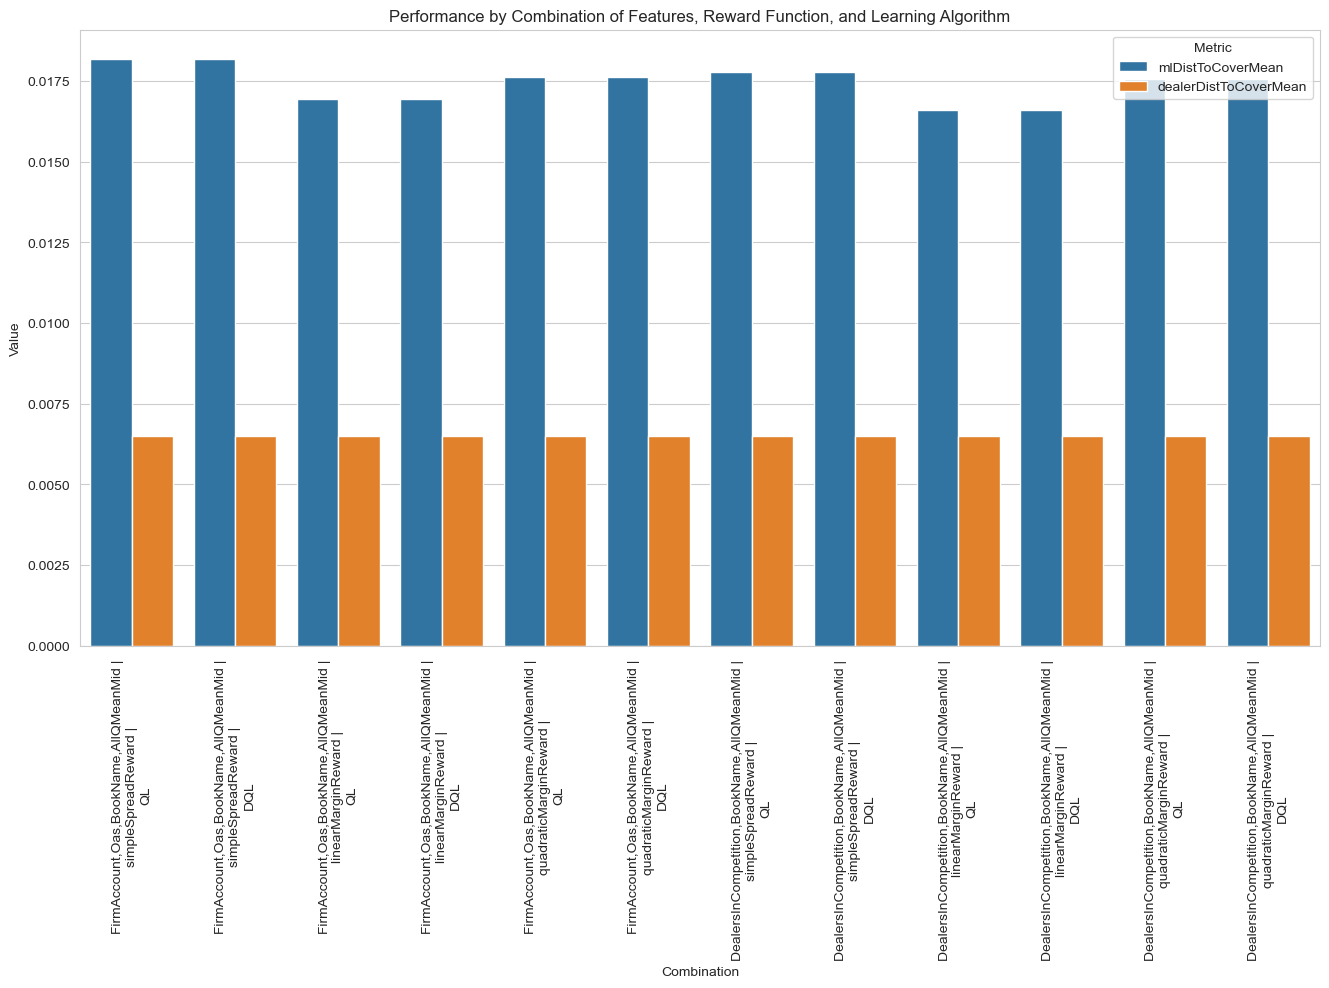

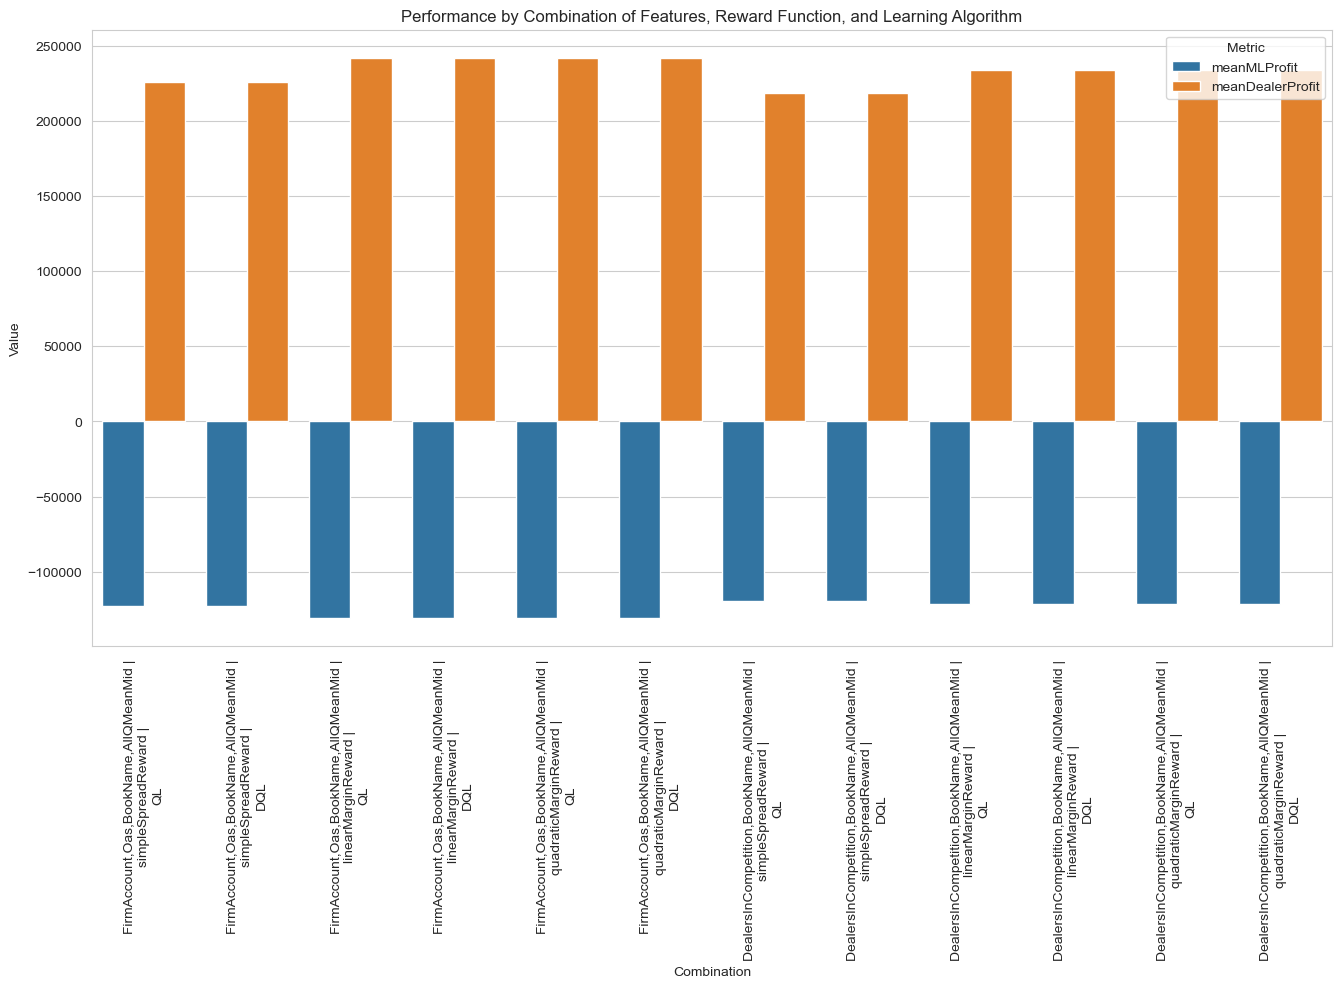

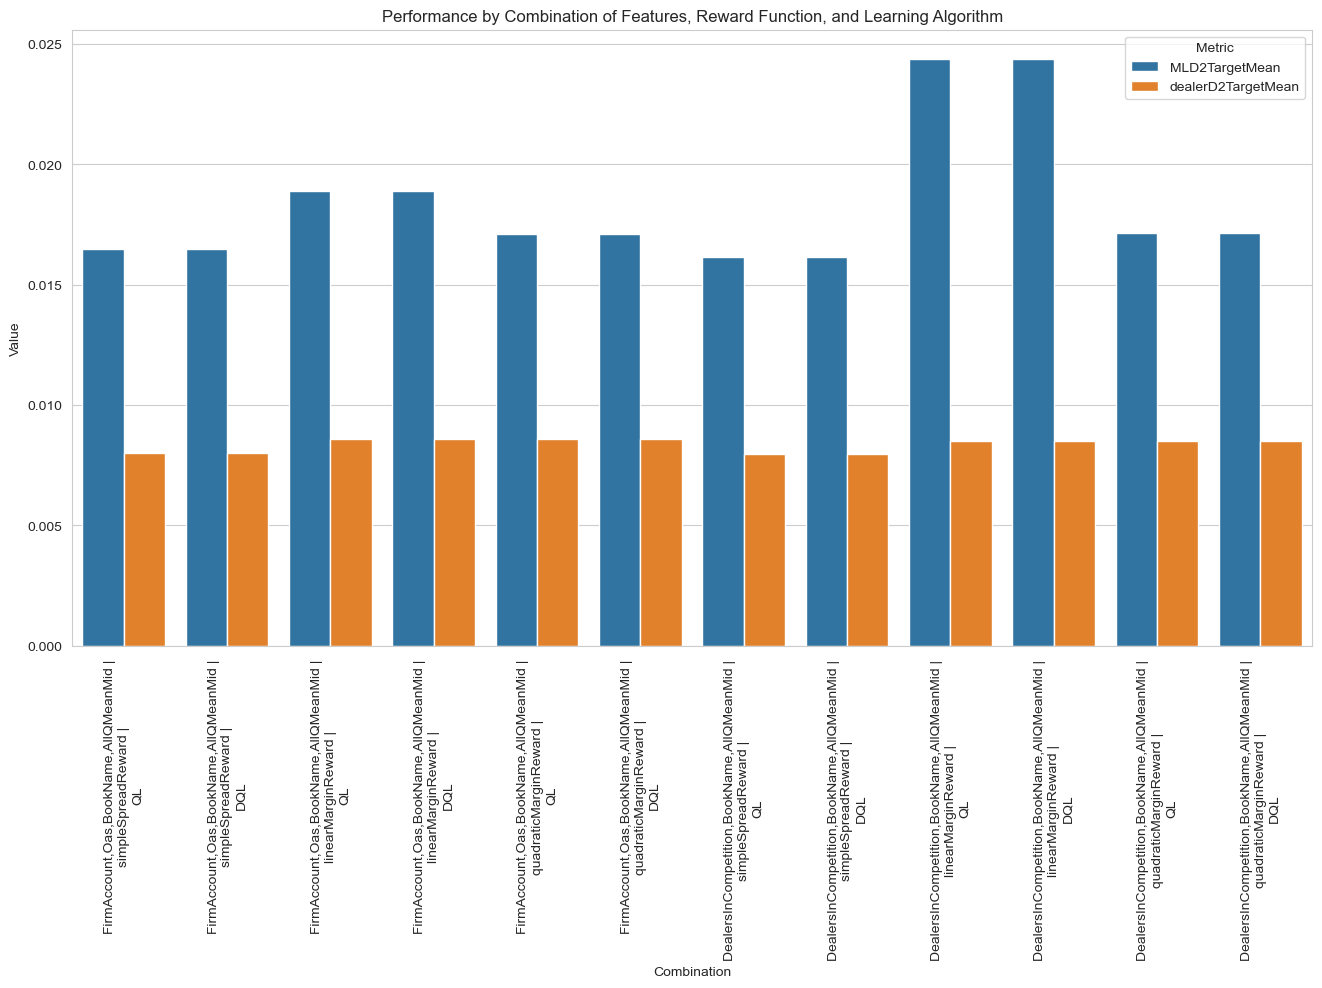

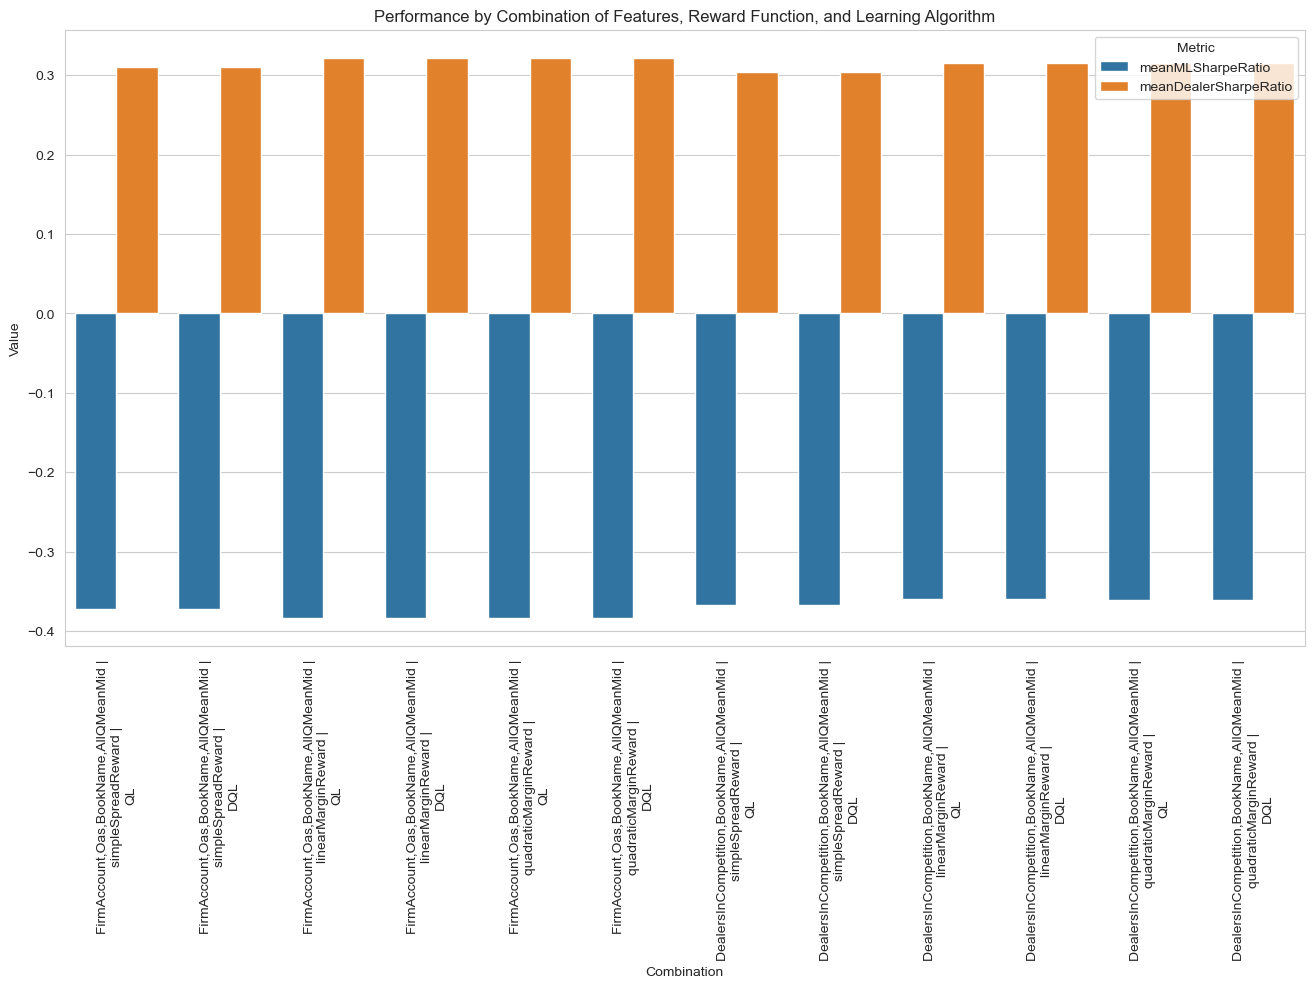

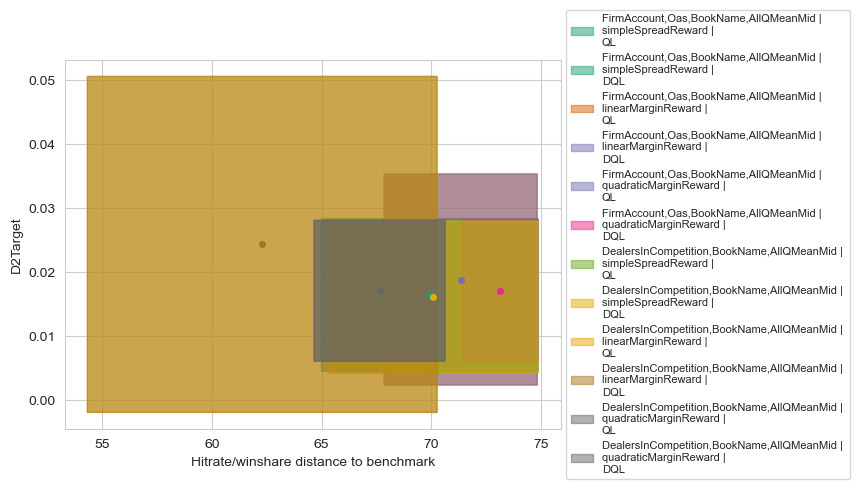



Results for ISIN DK0009295222, counts: 198
number of different states in dataset: 81,
size of statespace: 320,
state coverage by trajectory: 0.2531
number of different states in dataset: 81,
size of statespace: 320,
state coverage by trajectory: 0.2531
number of different states in dataset: 70,
size of statespace: 320,
state coverage by trajectory: 0.2188
number of different states in dataset: 70,
size of statespace: 320,
state coverage by trajectory: 0.2188
number of different states in dataset: 70,
size of statespace: 320,
state coverage by trajectory: 0.2188
number of different states in dataset: 70,
size of statespace: 320,
state coverage by trajectory: 0.2188
number of different states in dataset: 24,
size of statespace: 32,
state coverage by trajectory: 0.75
number of different states in dataset: 24,
size of statespace: 32,
state coverage by trajectory: 0.75
number of different states in dataset: 31,
size of statespace: 32,
state coverage by trajectory: 0.9688
number of differe

C:\Udvikler/Speciale/SpecialeKode\model_evaluation\eval_utilities.py:69: RuntimeWarning: Mean of empty slice
  return np.nanmean(df[df["MLMarginWins"]>= 0]["MLMarginWins"]) if len(df) > 0 else 0
C:\Udvikler/Speciale/SpecialeKode\model_evaluation\eval_utilities.py:56: RuntimeWarning: invalid value encountered in scalar divide
  return L / np.sqrt(total_squared_diffs / len(df))
C:\Udvikler/Speciale/SpecialeKode\model_evaluation\eval_utilities.py:69: RuntimeWarning: Mean of empty slice
  return np.nanmean(df[df["MLMarginWins"]>= 0]["MLMarginWins"]) if len(df) > 0 else 0
C:\Udvikler/Speciale/SpecialeKode\model_evaluation\eval_utilities.py:56: RuntimeWarning: invalid value encountered in scalar divide
  return L / np.sqrt(total_squared_diffs / len(df))


number of different states in dataset: 31,
size of statespace: 32,
state coverage by trajectory: 0.9688
                                                                                   dealerHitRate  \
Features                                  Reward Function       Learning Algorithm                 
FirmAccount,Oas,BookName,AllQMeanMid      simpleSpreadReward    QL                     11.111111   
                                                                DQL                    11.111111   
                                          linearMarginReward    QL                      7.692308   
                                                                DQL                     7.692308   
                                          quadraticMarginReward QL                      7.692308   
                                                                DQL                     7.692308   
DealersInCompetition,BookName,AllQMeanMid simpleSpreadReward    QL                     11.111111

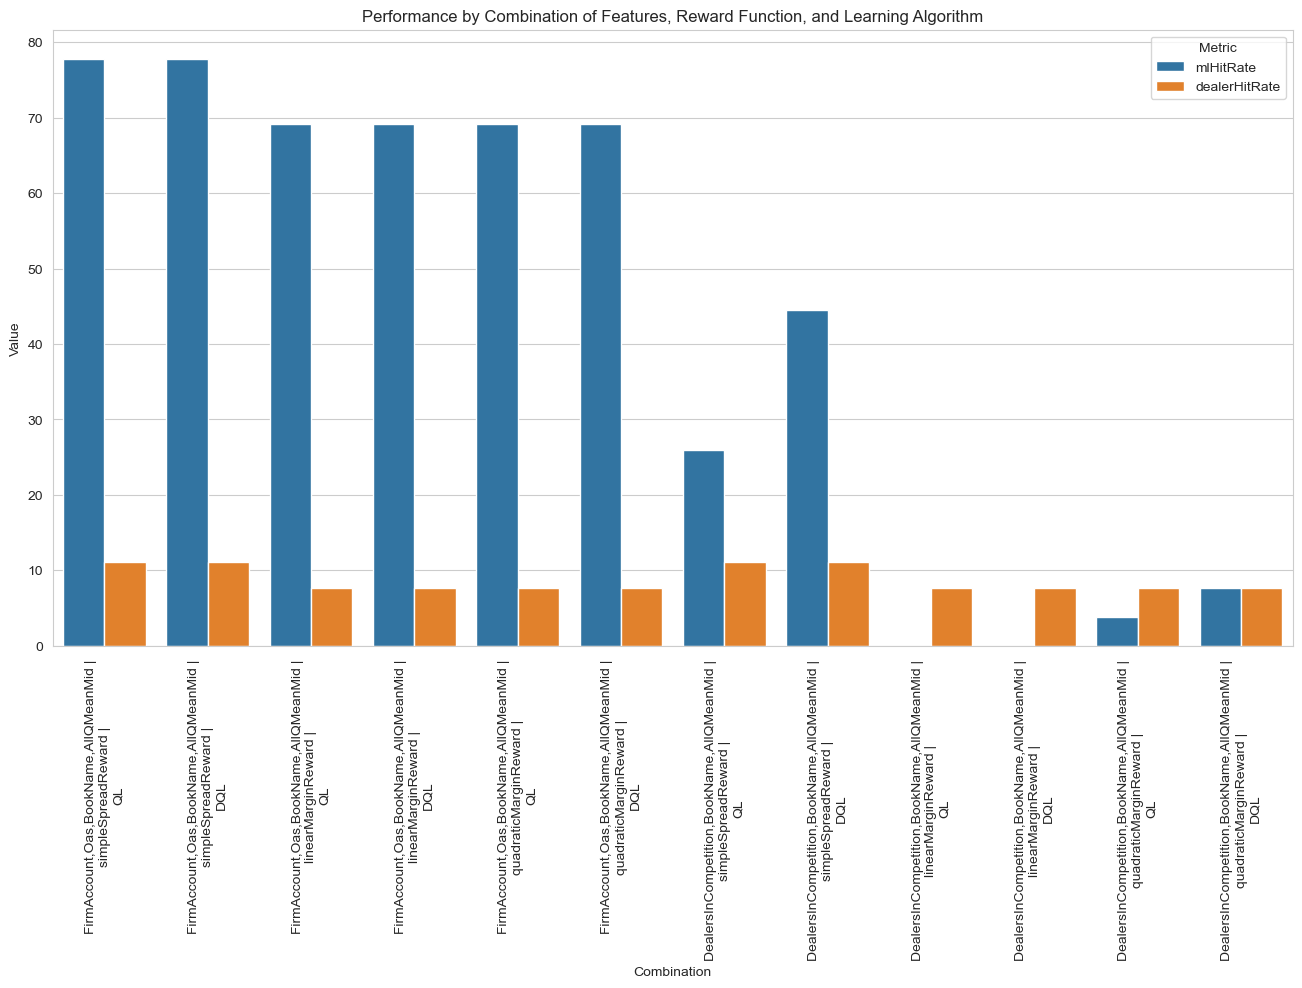

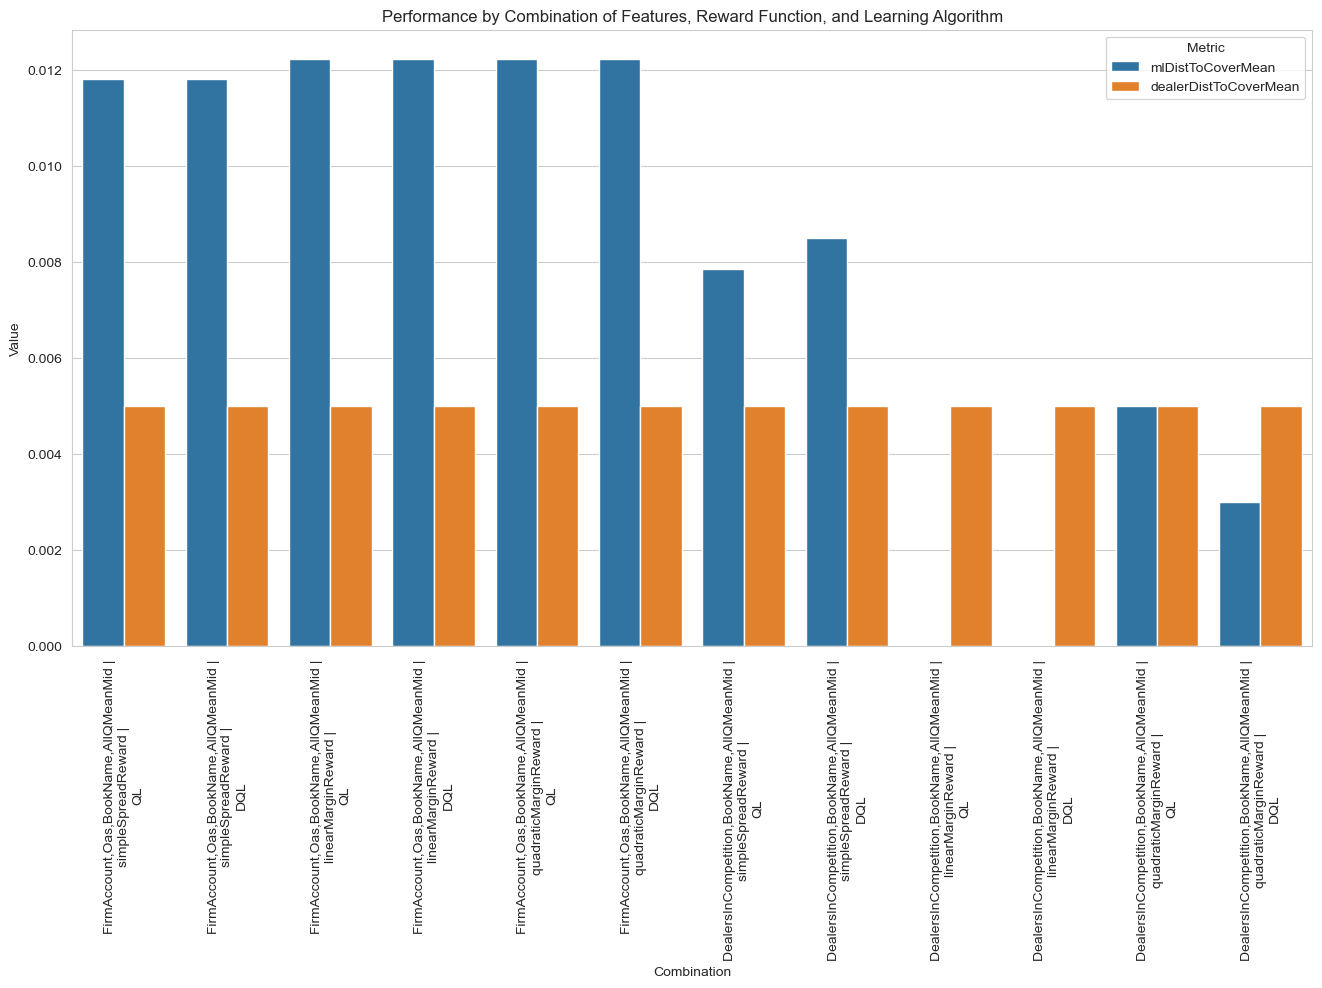

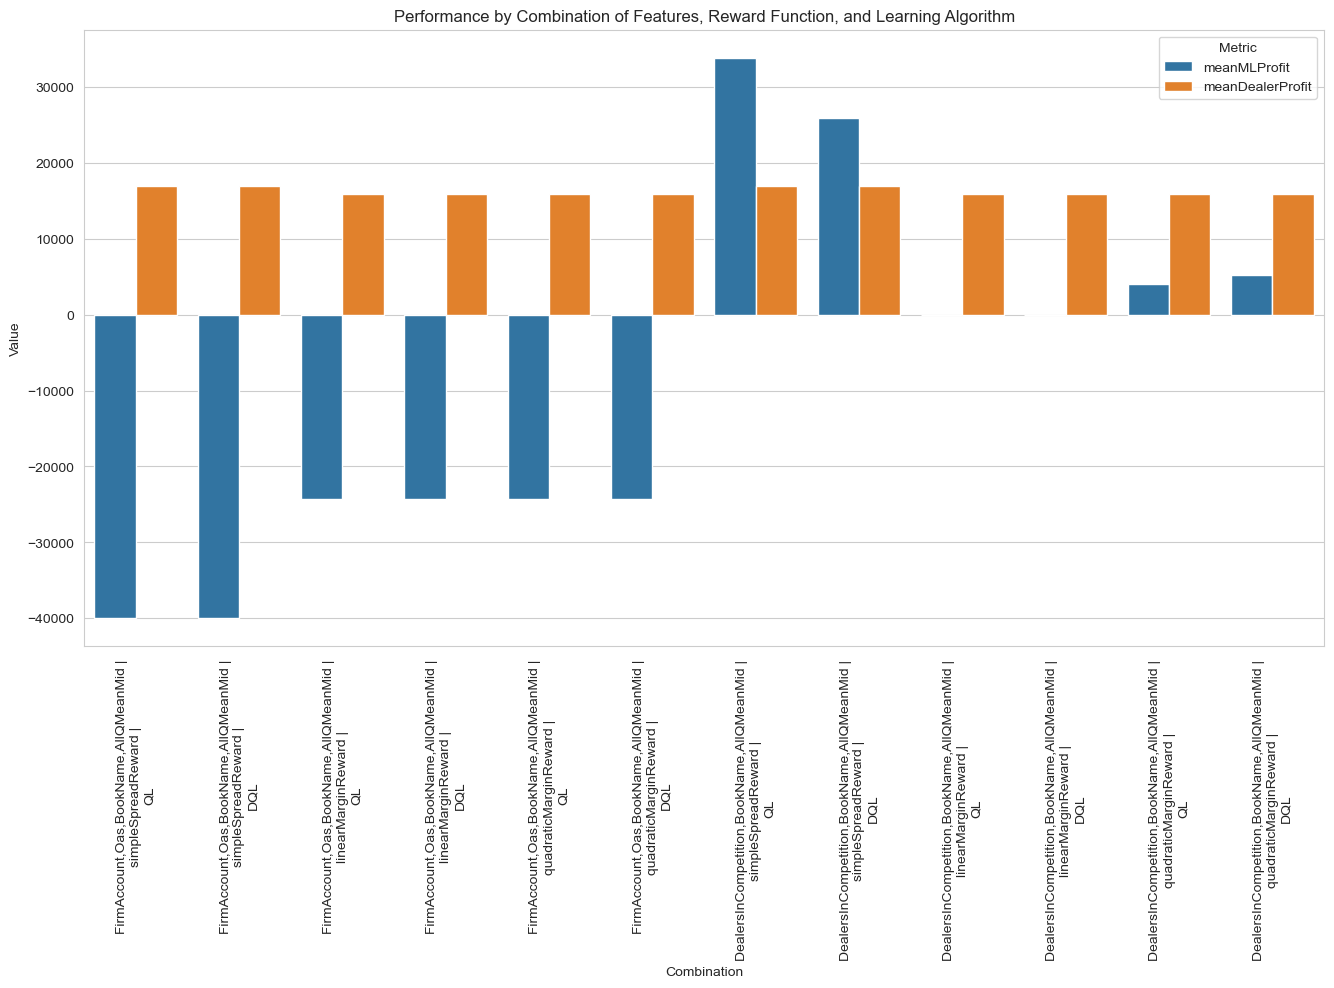

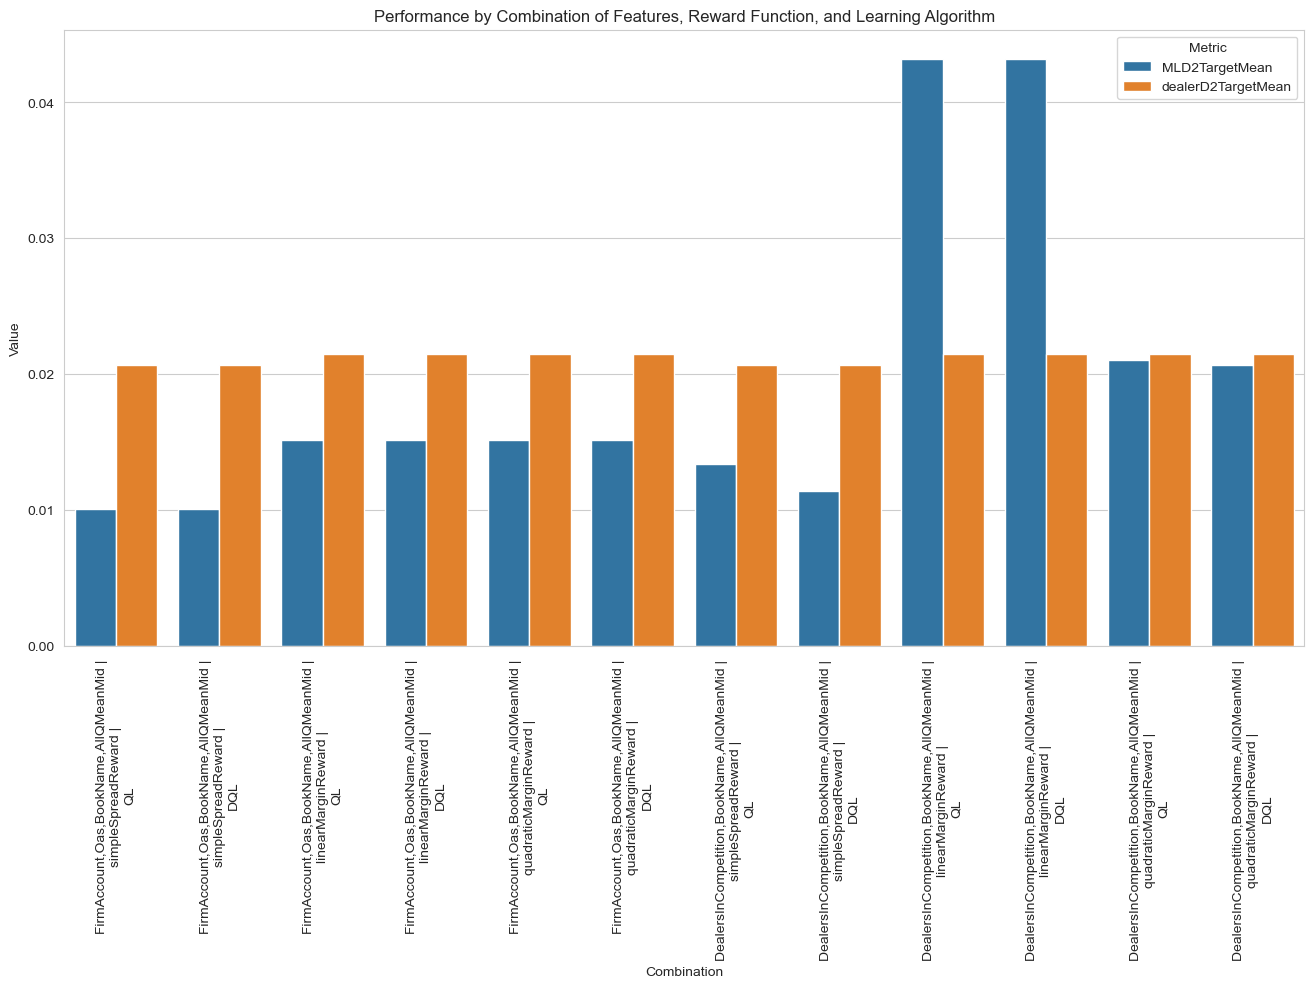

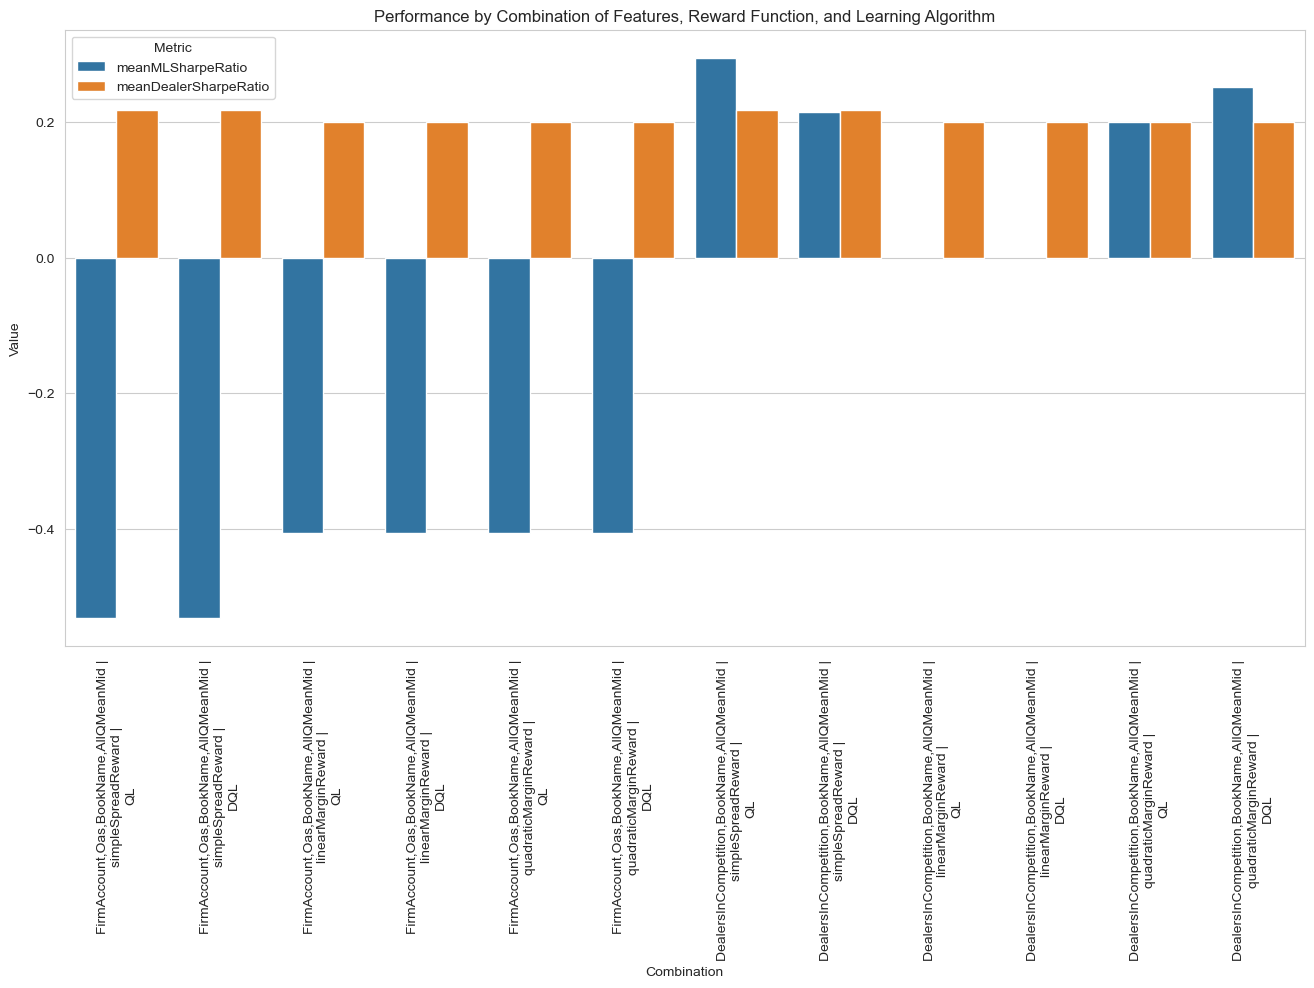

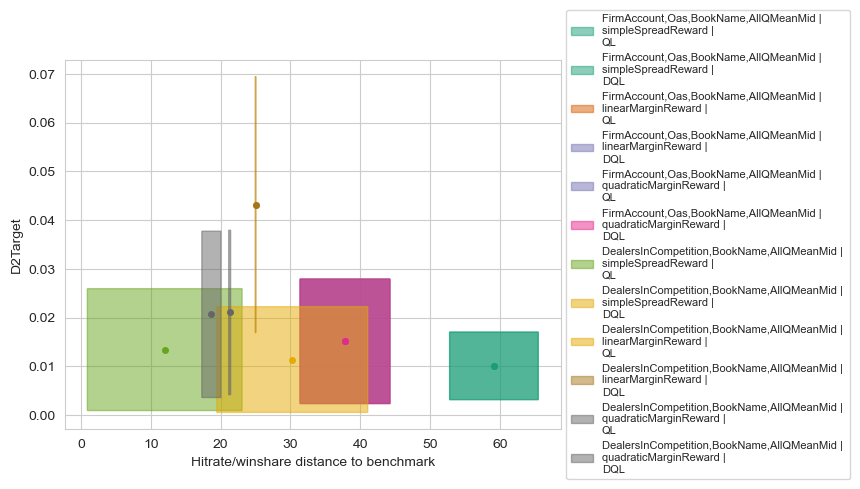

In [5]:
# Read the CSV file into a pandas DataFrame
file_path = "data/data_inventory_risk.csv"
df = pd.read_csv(file_path,  index_col=0)

# Datetime format
df["TradeTime"] = pd.to_datetime(df["TradeTime"], format="%m/%d/%Y %H:%M:%S")

isinCount = df.Isin.value_counts()
for isin, count in isinCount.head(5).items():
    # Filter the DataFrame for the current ISIN
    df_filtered = df[df.Isin == isin]
    df_filtered.reset_index(drop=True, inplace=True)
   
    #Split into train and test set  
    train_df, test_df = split_data(df_filtered, 0.7)

    #Further split test into val and test, to make model selection
    val_df, test_df = split_data(test_df.copy(), 0.5)

    print(f"Results for ISIN {isin}, counts: {count}")
    train_loop(train_df, val_df)
    print("\n")
